# INTRODUCTION

### Goal: 
#### To predict the selling price of houses in King County using Linear Regression, determine what factors have the most weight when determining the price of a house, and provide recommendations and intuition for those aiming to sell their homes.

### Column Descriptions:
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathrooms** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


# OBTAIN

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix, classification_report

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 0)
plt.style.use('seaborn')

In [2]:
kc_df_raw = pd.read_csv('kc_house_data.csv')

# SCRUB

## Looking into the columns

In [3]:
len(kc_df_raw)

21597

In [4]:
kc_df_raw.head()

id        date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  10/13/2014  221900.0  ... -122.257           1340        5650
1  6414100192   12/9/2014  538000.0  ... -122.319           1690        7639
2  5631500400   2/25/2015  180000.0  ... -122.233           2720        8062
3  2487200875   12/9/2014  604000.0  ... -122.393           1360        5000
4  1954400510   2/18/2015  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [5]:
kc_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There seem to be missing values in the following columns: 
- waterfront
- view
- yr_renovated

In [6]:
def perc_null(df, df_name='dataframe'):
    """
    Definition:
    Returns percentage of null values within each column of a dataframe
    
    Args:
    df = selected dataframe
    
    Returns:
    each column name of the df along with the percentage of null values in each column
    """
    dashes = '---'
    print(dashes*20)
    print('Percentage of Null values within each column:')
    print(dashes*20)
    display(round(kc_df_raw.isna().sum().divide(len(df))*100, 4))
    print(dashes*20)

In [7]:
perc_null(kc_df_raw)

------------------------------------------------------------
Percentage of Null values within each column:
------------------------------------------------------------


id                0.0000
date              0.0000
price             0.0000
bedrooms          0.0000
bathrooms         0.0000
sqft_living       0.0000
sqft_lot          0.0000
floors            0.0000
waterfront       11.0015
view              0.2917
condition         0.0000
grade             0.0000
sqft_above        0.0000
sqft_basement     0.0000
yr_built          0.0000
yr_renovated     17.7895
zipcode           0.0000
lat               0.0000
long              0.0000
sqft_living15     0.0000
sqft_lot15        0.0000
dtype: float64

------------------------------------------------------------


### 'date' column

In [8]:
kc_df_raw['date'].head(3)

0    10/13/2014
1     12/9/2014
2     2/25/2015
Name: date, dtype: object

#### Turning the 'date' column variables into datetime objects

In [9]:
kc_df_raw['date'] = pd.to_datetime(kc_df_raw['date'])

In [10]:
display(kc_df_raw.head(3))
type(kc_df_raw['date'].iloc[0])

id       date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520 2014-10-13  221900.0  ... -122.257           1340        5650
1  6414100192 2014-12-09  538000.0  ... -122.319           1690        7639
2  5631500400 2015-02-25  180000.0  ... -122.233           2720        8062

[3 rows x 21 columns]

pandas._libs.tslibs.timestamps.Timestamp

#### Looking at Frequency of House Sales in relation to Months

In [11]:
kc_df_raw['month'] = pd.DatetimeIndex(kc_df_raw['date']).month

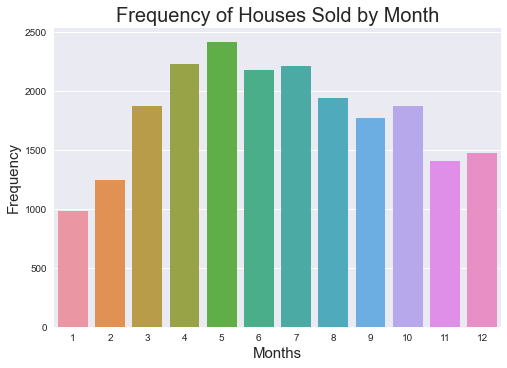

In [12]:
sns.countplot(kc_df_raw['month'])
plt.title('Frequency of Houses Sold by Month', fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Frequency', fontsize=15);

#### More houses sell during the warmer months (April-July) in Kings County, WA.

### 'bedrooms' column

In [13]:
kc_df_raw['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

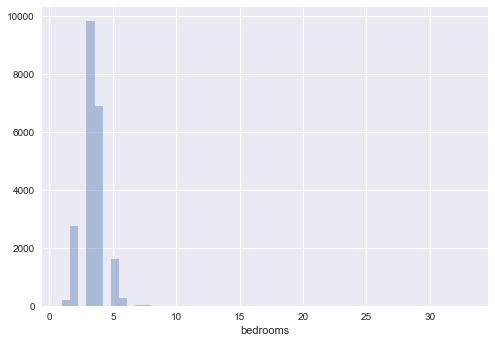

In [14]:
sns.distplot(kc_df_raw['bedrooms'], kde=False);

#### There are some major outliers in the bedroom column

### 'bathrooms' column

In [15]:
kc_df_raw['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

### 'bath_per_bed' column


In [16]:
kc_df_raw['bath_per_bed'] = kc_df_raw['bathrooms'] / kc_df_raw['bedrooms']

In [17]:
kc_df_raw.head(3)

id       date     price  ...  sqft_lot15  month  bath_per_bed
0  7129300520 2014-10-13  221900.0  ...        5650     10      0.333333
1  6414100192 2014-12-09  538000.0  ...        7639     12      0.750000
2  5631500400 2015-02-25  180000.0  ...        8062      2      0.500000

[3 rows x 23 columns]

In [18]:
kc_df_raw['bath_per_bed'].describe()

count    21597.000000
mean         0.640969
std          0.211651
min          0.053030
25%          0.500000
50%          0.625000
75%          0.750000
max          2.500000
Name: bath_per_bed, dtype: float64

### 'sqft_living' column

In [19]:
kc_df_raw['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

#### Have some major outliers in sqft living

### 'sqft_lot' column

In [20]:
kc_df_raw['sqft_lot'].describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

#### Major outliers in sqft lot

### 'floors' column

In [21]:
kc_df_raw['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

### 'waterfront' column

In [22]:
kc_df_raw['waterfront'].isna().sum()

2376

In [23]:
kc_df_raw['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

#### Filling null NaN values with the 'waterfront' median

In [24]:
waterfront_median = kc_df_raw['waterfront'].median()
waterfront_median

0.0

In [25]:
kc_df_raw['waterfront'] = kc_df_raw['waterfront'].fillna(waterfront_median)

In [26]:
kc_df_raw['waterfront'].isna().sum()

0

In [27]:
kc_df_raw['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [28]:
kc_df_raw['waterfront'].unique()

array([0., 1.])

In [29]:
kc_df_raw['waterfront'] = kc_df_raw['waterfront'].astype('bool').astype('int')

### 'view' column

In [30]:
kc_df_raw['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [31]:
kc_df_raw['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [32]:
kc_df_raw['view'] = kc_df_raw['view'].fillna(0)

In [33]:
kc_df_raw['view'] = kc_df_raw['view'].astype('bool').astype('int')

### 'condition' column

In [34]:
kc_df_raw['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [35]:
kc_df_raw['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

### 'grade' column

In [36]:
kc_df_raw['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [37]:
kc_df_raw['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

### 'sqft_above' column

In [38]:
kc_df_raw['sqft_above'].describe()

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

### 'sqft_basement' column

In [39]:
kc_df_raw.sort_values('sqft_basement', ascending=False)

id       date     price  ...  sqft_lot15  month  bath_per_bed
19044  1421039067 2014-10-27  218000.0  ...       17394     10      0.250000
3017   7454000110 2015-01-27  202000.0  ...        7218      1      0.500000
11564  2473510260 2014-06-23  460000.0  ...        9600      6      0.500000
15610  1223039242 2015-01-26  388000.0  ...        7650      1      0.583333
1205    194000505 2014-09-04  651000.0  ...        4640      9      0.666667
...           ...        ...       ...  ...         ...    ...           ...
9105   1568100300 2014-09-17  350000.0  ...        8460      9      0.750000
9109   4204400201 2014-10-21  216180.0  ...        7200     10      0.500000
9110   8856890330 2014-09-15  300000.0  ...        9769      9      0.562500
9111   1922059278 2014-10-14  145000.0  ...        9435     10      0.333333
21596  1523300157 2014-10-15  325000.0  ...        1357     10      0.375000

[21597 rows x 23 columns]

#### Some string values in basement column, so we are going to calculate the basement area for every house in the dataset by subtracting 'sqft_above' from 'sqft_living'

In [40]:
kc_df_raw['sqft_basement'] = kc_df_raw['sqft_living'] - kc_df_raw['sqft_above']

### 'has_basement' column

In [41]:
kc_df_raw['has_basement'] = kc_df_raw['sqft_basement'].astype('bool').astype('int')

In [42]:
kc_df_raw.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int32
view                      int32
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
month                     int64
bath_per_bed            float64
has_basement              int32
dtype: object

### 'yr_built' column

In [43]:
kc_df_raw['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

### 'house_age' column

In [44]:
kc_df_raw['house_age'] = 2020 - kc_df_raw['yr_built']

In [45]:
kc_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int32         
 9   view           21597 non-null  int32         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

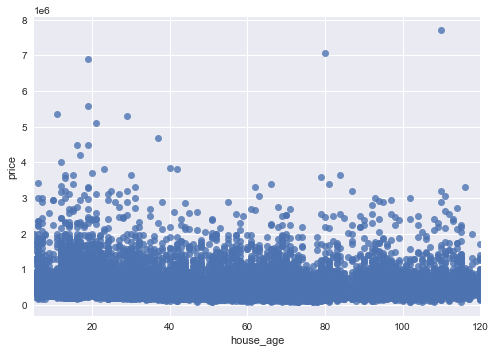

In [46]:
sns.regplot('house_age', 'price', kc_df_raw);

### 'yr_renovated' column

In [47]:
kc_df_raw.sort_values('yr_renovated', ascending=False)

id       date      price  ...  bath_per_bed  has_basement  house_age
11587  7284900030 2014-05-22   850000.0  ...        0.8125             0         97
2293   8712100320 2014-07-28   585000.0  ...        0.5500             1         98
3153   6821100195 2015-03-31   830000.0  ...        0.7500             1         52
18560  8935100100 2014-07-01   476000.0  ...        0.7500             1         75
7090   9141100005 2014-10-28   285000.0  ...        0.8750             0         80
...           ...        ...        ...  ...           ...           ...        ...
21576  1931300412 2015-04-16   475000.0  ...        0.7500             0         12
21577  8672200110 2015-03-17  1090000.0  ...        0.7500             0         14
21579  1972201967 2014-10-31   520000.0  ...        1.1250             1         14
21581   191100405 2015-04-21  1580000.0  ...        0.8125             0         13
21583  7202300110 2014-09-15   810000.0  ...        0.7500             0         17

[21597 rows x 25 columns]

In [48]:
kc_df_raw['yr_renovated'] = kc_df_raw['yr_renovated'].fillna(0)

In [49]:
kc_df_raw['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

### 'renovated' column

In [50]:
kc_df_raw['renovated'] = kc_df_raw['yr_renovated'].astype('bool').astype('int')

In [51]:
kc_df_raw.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int32
view                      int32
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
month                     int64
bath_per_bed            float64
has_basement              int32
house_age                 int64
renovated                 int32
dtype: object

### 'zipcode' column

In [52]:
kc_df_raw['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [53]:
kc_df_raw['zipcode'] = kc_df_raw['zipcode']

In [54]:
zipcodes = list(kc_df_raw['zipcode'].unique())

In [55]:
zipcode_dict = {}
all_zips = kc_df_raw.groupby('zipcode')
for z in zipcodes:
    zipcode_dict[z] = all_zips.get_group(z).reset_index()['price']

In [56]:
zip_df = pd.DataFrame(zipcode_dict)

In [57]:
zip_mean = zip_df.reindex(zip_df.mean().sort_values(ascending=False).index, axis=1)

#### Creating a top 25 zipcode by price Series

In [58]:
top_zips = zip_mean.iloc[:,0:24]

In [59]:
top_zips.count()

98039     50
98004    317
98040    282
98112    269
98102    104
98109    109
98105    229
98006    498
98119    184
98005    168
98033    432
98199    317
98075    359
98074    441
98077    198
98053    403
98177    255
98008    283
98052    574
98122    290
98115    583
98116    330
98007    141
98027    412
dtype: int64

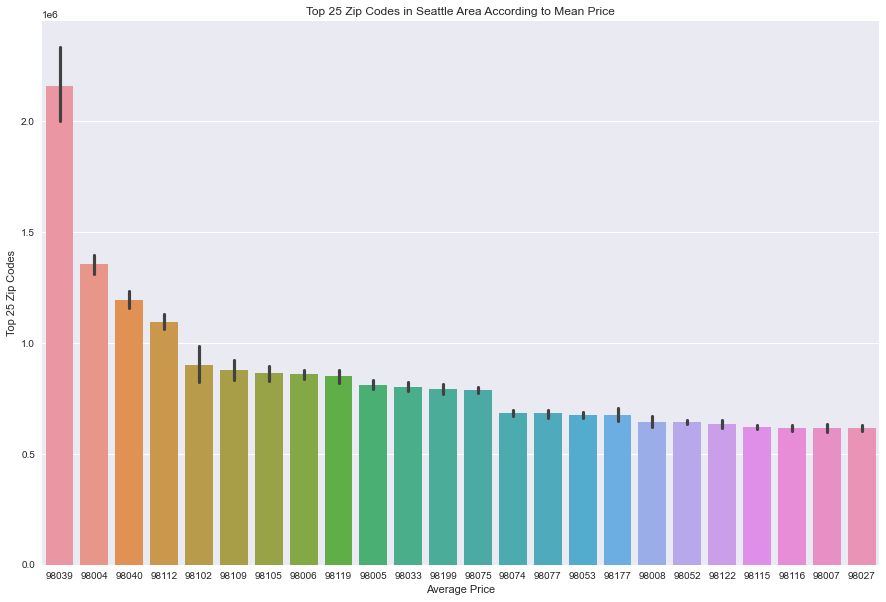

In [60]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    ax = sns.barplot(data=top_zips, ci=68)
    ax.set_xlabel('Average Price')
    ax.set_ylabel('Top 25 Zip Codes')
    ax.set_title('Top 25 Zip Codes in Seattle Area According to Mean Price');

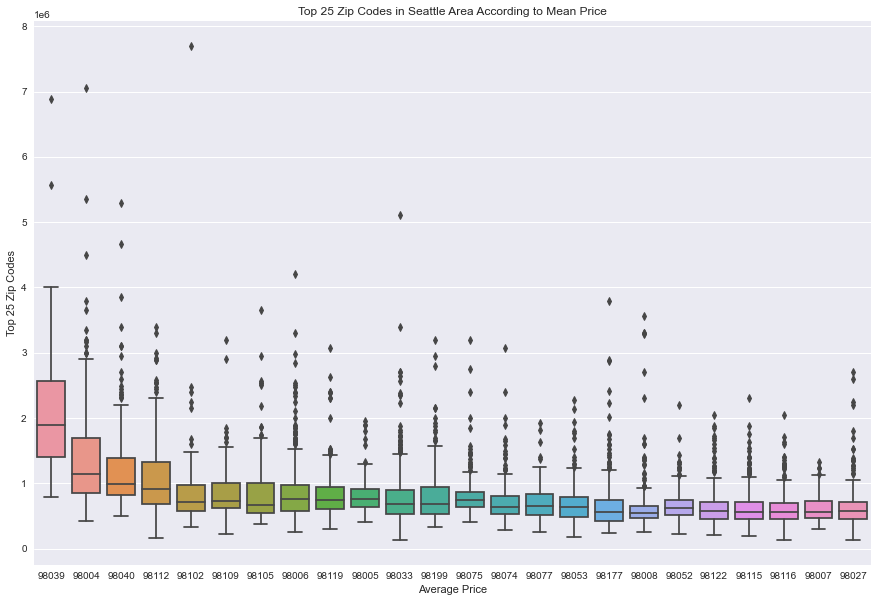

In [61]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    ax = sns.boxplot(data=top_zips)
    ax.set_xlabel('Average Price')
    ax.set_ylabel('Top 25 Zip Codes')
    ax.set_title('Top 25 Zip Codes in Seattle Area According to Mean Price');

In [62]:
zip_df.describe().round(2)

98178       98125       98028  ...       98014      98055      98039
count      262.00      409.00      283.00  ...      124.00     268.00       50.0
mean    310612.76   469928.77   462488.87  ...   455617.11  304262.11  2161300.0
std     161044.75   205631.89   149529.74  ...   258603.42   93438.98  1166904.4
min      90000.00   175000.00   160000.00  ...    80000.00  100000.00   787500.0
25%     223250.00   357500.00   379975.00  ...   308500.00  239750.00  1402500.0
50%     278277.00   425000.00   445000.00  ...   415000.00  294950.00  1895000.0
75%     349792.50   518000.00   525875.00  ...   536000.00  349962.50  2560000.0
max    1700000.00  2050000.00  1600000.00  ...  1680000.00  631000.00  6890000.0

[8 rows x 70 columns]

### 'subregion' column

In [63]:
zip_list = kc_df_raw['zipcode'].astype('int64').copy()

In [64]:
zip_list.sort_values().unique()

array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
       98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
       98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
       98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
       98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
       98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
       98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
       98166, 98168, 98177, 98178, 98188, 98198, 98199], dtype=int64)

In [65]:
subregion_dict = {'south_urban': [98001, 98002, 98003, 98023, 98030, 98031, 98032, 98042, 
                                 98055, 98056, 98058, 98092, 98148, 98166, 98168, 98178, 98188,
                                 98198], 
                 'east_urban' : [98004, 98005, 98006, 98007, 98008, 98009, 98027, 98029, 
                                 98033, 98034, 98039, 98040, 98052, 98053, 98059, 98074, 
                                98075, 98077],
                 'south_rural' : [98010, 98022, 98038],
                 'north' : [98011, 98028, 98072, 98155],
                 'east_rural' : [98014, 98019, 98024, 98045, 98065],
                 'vashon_island' : [98070], 
                 'seattle' : [98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115,
                             98116, 98117, 98118, 98119, 98122, 98125, 98126, 98136, 98144, 98199], 
                 'north_and_seattle' : [98133, 98177], 
                 'south_and_seattle' : [98146]}

In [66]:
subregion_dict.keys()

dict_keys(['south_urban', 'east_urban', 'south_rural', 'north', 'east_rural', 'vashon_island', 'seattle', 'north_and_seattle', 'south_and_seattle'])

In [67]:
kc_df_raw['subregion'] = kc_df_raw['zipcode'].astype('int').copy()

In [68]:
kc_df_raw['subregion']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: subregion, Length: 21597, dtype: int32

In [69]:
i=0
for zipc in kc_df_raw['zipcode'].astype('int'):
    for key, val in subregion_dict.items():
        for item in val:
            if item == zipc:
                kc_df_raw['subregion'][i] = key
    i+=1


In [70]:
kc_df_raw['subregion'] = kc_df_raw['subregion'].astype('category')

In [71]:
kc_df_raw['subregion'].unique()

['south_urban', 'seattle', 'north', 'east_urban', 'south_and_seattle', 'south_rural', 'east_rural', 'north_and_seattle', 'vashon_island']
Categories (9, object): ['south_urban', 'seattle', 'north', 'east_urban', ..., 'south_rural', 'east_rural', 'north_and_seattle', 'vashon_island']

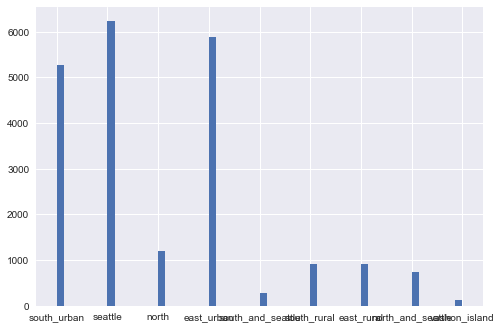

In [72]:
kc_df_raw['subregion'].hist(bins='auto');

### 'lat' column

In [73]:
kc_df_raw['lat'].nunique()

5033

### 'long' column

In [74]:
kc_df_raw['long'].nunique()

751

In [75]:
kc_df_raw['long'].describe()

count    21597.000000
mean      -122.213982
std          0.140724
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

### 'sqft_living15' column

In [76]:
kc_df_raw['sqft_living15'].describe()

count    21597.000000
mean      1986.620318
std        685.230472
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

### 'sqft_lot15' column

<AxesSubplot:xlabel='sqft_lot', ylabel='sqft_lot15'>

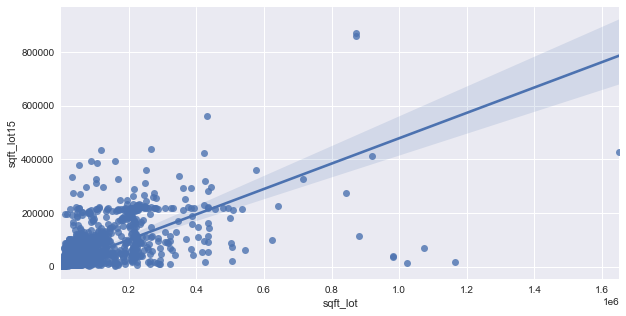

In [77]:
plt.figure(figsize=(10,5))
sns.regplot(data=kc_df_raw, x='sqft_lot', y='sqft_lot15')

In [78]:
kc_df_raw['sqft_lot15'].describe()

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

#### Some major outliers in sqft_lot15

### 'id' column

In [79]:
df_length = len(kc_df_raw)

In [80]:
unique_ids = kc_df_raw['id'].nunique()

In [81]:
duplicates = df_length - unique_ids
duplicates / df_length

0.008195582719822198

In [82]:
kc_df_raw.drop_duplicates(subset='id', inplace=True)

In [83]:
kc_df_raw.head()

id       date     price  ...  house_age  renovated    subregion
0  7129300520 2014-10-13  221900.0  ...         65          0  south_urban
1  6414100192 2014-12-09  538000.0  ...         69          1      seattle
2  5631500400 2015-02-25  180000.0  ...         87          0        north
3  2487200875 2014-12-09  604000.0  ...         55          0      seattle
4  1954400510 2015-02-18  510000.0  ...         33          0   east_urban

[5 rows x 27 columns]

In [84]:
kc_df_raw.set_index('id', inplace=True)

In [85]:
kc_df_raw.head()

date     price  bedrooms  ...  house_age  renovated    subregion
id                                         ...                                   
7129300520 2014-10-13  221900.0         3  ...         65          0  south_urban
6414100192 2014-12-09  538000.0         3  ...         69          1      seattle
5631500400 2015-02-25  180000.0         2  ...         87          0        north
2487200875 2014-12-09  604000.0         4  ...         55          0      seattle
1954400510 2015-02-18  510000.0         3  ...         33          0   east_urban

[5 rows x 26 columns]

### 'price' column

In [86]:
kc_df_raw['price'].describe()

count    2.142000e+04
mean     5.407393e+05
std      3.679311e+05
min      7.800000e+04
25%      3.225000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

### Looking at number of unique values within each column

In [87]:
for col in kc_df_raw.columns:
    print(f'{col} - unique values: {kc_df_raw[col].nunique()}')

date - unique values: 372
price - unique values: 3607
bedrooms - unique values: 12
bathrooms - unique values: 29
sqft_living - unique values: 1034
sqft_lot - unique values: 9776
floors - unique values: 6
waterfront - unique values: 2
view - unique values: 2
condition - unique values: 5
grade - unique values: 11
sqft_above - unique values: 942
sqft_basement - unique values: 306
yr_built - unique values: 116
yr_renovated - unique values: 70
zipcode - unique values: 70
lat - unique values: 5033
long - unique values: 751
sqft_living15 - unique values: 777
sqft_lot15 - unique values: 8682
month - unique values: 12
bath_per_bed - unique values: 87
has_basement - unique values: 2
house_age - unique values: 116
renovated - unique values: 2
subregion - unique values: 9


### 'price_per_sqft' column

In [88]:
kc_df_raw['price_per_sqft'] = kc_df_raw['price'] / kc_df_raw['sqft_living']

In [89]:
kc_df_raw.head(3)

date     price  ...    subregion  price_per_sqft
id                               ...                             
7129300520 2014-10-13  221900.0  ...  south_urban      188.050847
6414100192 2014-12-09  538000.0  ...      seattle      209.338521
5631500400 2015-02-25  180000.0  ...        north      233.766234

[3 rows x 27 columns]

## Looking at the shapes of the data

In [90]:
def pull_quantiles(df, col_name, selected_quantile, starting_quantile=1, printing=0):
    """
    Definition:
    returns the selected quantile value of the column within your dataframe. You may also print all
    the values 
    
    Args:
    df = selected dataframe
    col_name = selected col_name in dataframe
    starting_quantile = quantile you wish to begin printing at
    selected_quantile = quantile you wish to be returned
    printing = boolean value indicating if you would like a range of quantiles printed for the col
    
    Returns:
    A number that corresponds with the selected quantile
    """
    sel_quan = df[col_name].quantile(q=selected_quantile/100)
    for i in range(starting_quantile,100):
        q=i/100
        if printing == 1:
            print(f"{q*100} percentile: {df[col_name].quantile(q=q)}")
    return sel_quan

In [91]:
def cut_ends(df, col_name, lower, upper, orig_df=0, activate=0):
    """
    Definition: 
    Uses the pull_quantiles() function on the dataframe to retrieve selected upper and lower quantiles 
    of a certain column, and returns number of rows remaining (True) and number of rows that qould be dropped if the 
    dataframe would be cut within the ower and upper quantile bounds (False)within the bounds of the quantiles. If activate is True, 
    it will use the pull_quantiles() function on the orig_df and create a new dataframe from df within the selected 
    upper and lower quantiles.
    
    Args:
    df = dataframe to be cut by selected quantiles
    col_name = target column used in retrieving upper and lower quantiles
    lower = selected lower quantile
    upper = selected upper quantile
    orig_df = default is 0. If you wish to use a dataframe as orig_df, please also mark activate = 1.
    activate = default is 0. If there is an orig_df, activate must be equal to 1 in order for the orig_df
    to be used.
    
    Returns:
    The dataframe (df arg) within the bounds of the upper and lower quantiles.
    """
    if activate == 0:
        low = pull_quantiles(df, col_name, selected_quantile=lower)
        high = pull_quantiles(df, col_name, selected_quantile=upper)
    else:
        low = pull_quantiles(orig_df, col_name, selected_quantile=lower)
        high = pull_quantiles(orig_df, col_name, selected_quantile=upper)
    return ((df[col_name] >= low) & (df[col_name] <= high)).value_counts()

In [92]:
for col in kc_df_raw.describe().columns:
    print(cut_ends(kc_df_raw, col, 1, 99))

True     20992
False      428
Name: price, dtype: int64
True     21167
False      253
Name: bedrooms, dtype: int64
True     21160
False      260
Name: bathrooms, dtype: int64
True     21014
False      406
Name: sqft_living, dtype: int64
True     20995
False      425
Name: sqft_lot, dtype: int64
True     21413
False        7
Name: floors, dtype: int64
True     21274
False      146
Name: waterfront, dtype: int64
True    21420
Name: view, dtype: int64
True     21230
False      190
Name: condition, dtype: int64
True     21291
False      129
Name: grade, dtype: int64
True     21015
False      405
Name: sqft_above, dtype: int64
True     21207
False      213
Name: sqft_basement, dtype: int64
True     21195
False      225
Name: yr_built, dtype: int64
True     21234
False      186
Name: yr_renovated, dtype: int64
True    21420
Name: zipcode, dtype: int64
True     20990
False      430
Name: lat, dtype: int64
True     21011
False      409
Name: long, dtype: int64
True     21005
False      415
Nam

In [93]:
upper_lot = pull_quantiles(kc_df_raw, 'sqft_lot', 99, 99, 0)
lower_lot = pull_quantiles(kc_df_raw, 'sqft_lot', 1, 1, 0)
print(upper_lot, lower_lot)

213008.0 1012.19


#### Setting the filters for our defined Dataset

In [94]:
kc_df_raw = kc_df_raw[(kc_df_raw['sqft_lot'] <= upper_lot) &
                      (kc_df_raw['sqft_lot'] >= lower_lot)]

#### Using long and lat to view some variables on a scatterplot

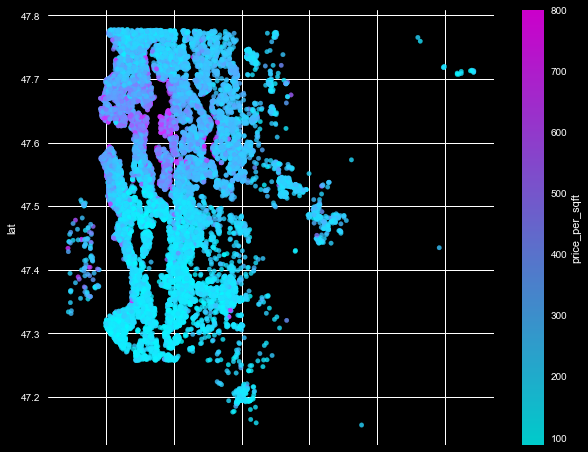

In [102]:
with plt.style.context('dark_background'):
    kc_df_raw.plot(kind='scatter', x='long', y='lat', alpha=0.8, figsize=(10, 8),
             c='price_per_sqft', colorbar=True, cmap=plt.get_cmap('cool'));

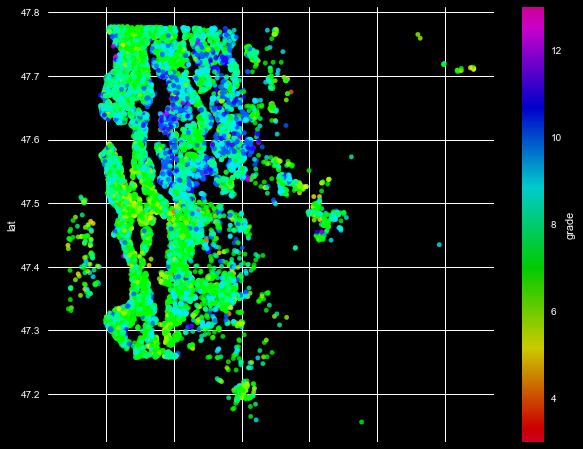

In [100]:
with plt.style.context('dark_background'):
    kc_df_raw.plot(kind='scatter', x='long', y='lat', alpha=0.8, figsize=(10,8),
             c='grade', colorbar=True, cmap=plt.get_cmap("gist_rainbow"));

In [104]:
kc_clean = kc_df_raw.copy()

In [105]:
len(kc_clean)

20995

In [106]:
kc_clean.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'bath_per_bed', 'has_basement',
       'house_age', 'renovated', 'subregion', 'price_per_sqft'],
      dtype='object')

### Save and Load kc_clean from here

In [104]:
unwanted = ['date', 'yr_built', 'yr_renovated']
kc_clean.drop(unwanted, axis=1, inplace=True)
kc_clean['zipcode'] = kc_clean['zipcode'].astype('str')

In [105]:
with open('kc_housing.pickle', 'wb') as f:
    pickle.dump(kc_clean, f, pickle.HIGHEST_PROTOCOL)

In [248]:
with open('kc_housing.pickle', 'rb') as f:
    kc_clean = pickle.load(f)

In [249]:
kc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20995 entries, 7129300520 to 1523300157
Data columns (total 24 columns):
price             20995 non-null float64
bedrooms          20995 non-null int64
bathrooms         20995 non-null float64
sqft_living       20995 non-null int64
sqft_lot          20995 non-null int64
floors            20995 non-null float64
waterfront        20995 non-null int32
view              20995 non-null int32
condition         20995 non-null int64
grade             20995 non-null int64
sqft_above        20995 non-null int64
sqft_basement     20995 non-null int64
zipcode           20995 non-null object
lat               20995 non-null float64
long              20995 non-null float64
sqft_living15     20995 non-null int64
sqft_lot15        20995 non-null int64
month             20995 non-null int64
bath_per_bed      20995 non-null float64
has_basement      20995 non-null int32
house_age         20995 non-null int64
renovated         20995 non-null int32
subreg

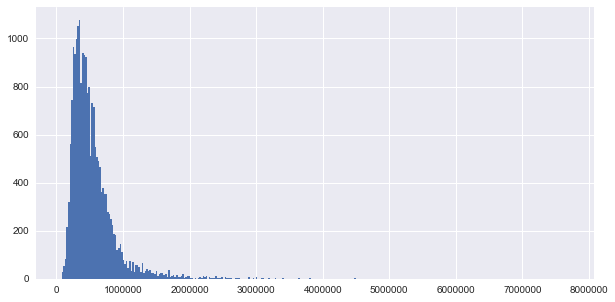

In [108]:
kc_clean['price'].hist(bins='auto', figsize=(10,5));

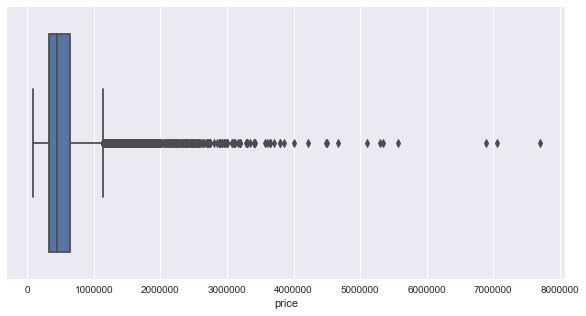

In [109]:
plt.figure(figsize=(10,5))
sns.boxplot(kc_clean['price'])

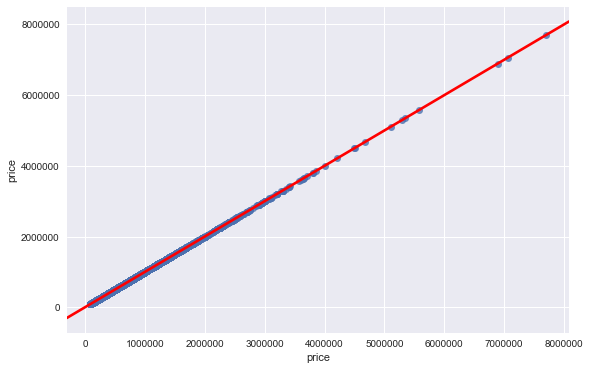

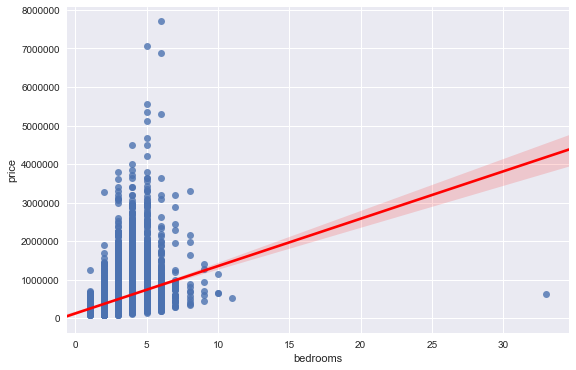

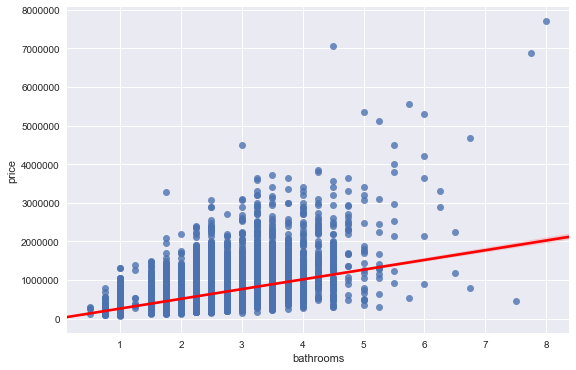

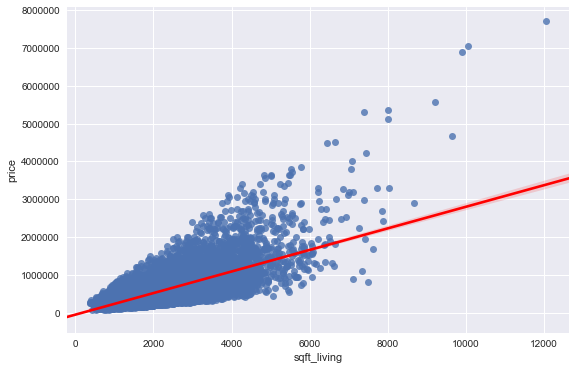

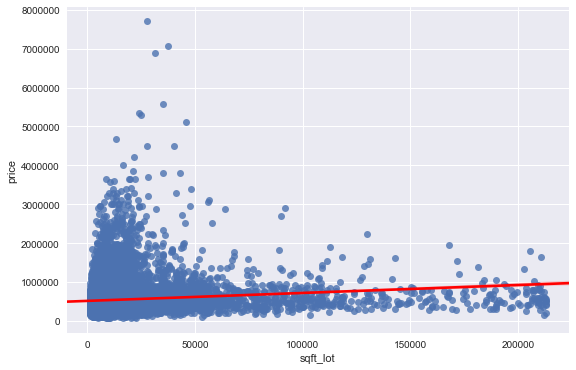

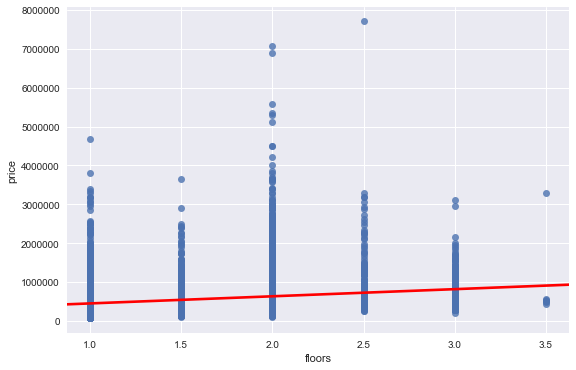

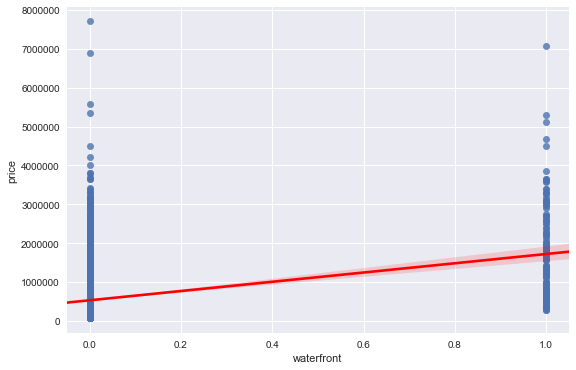

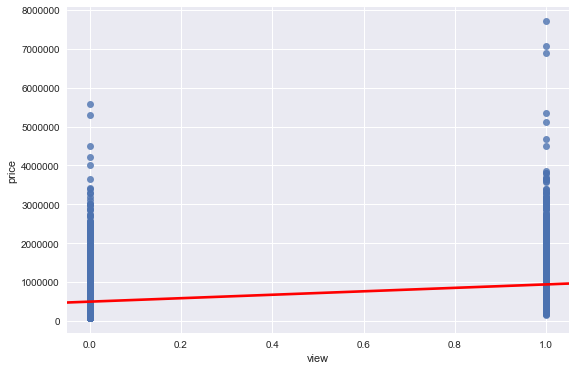

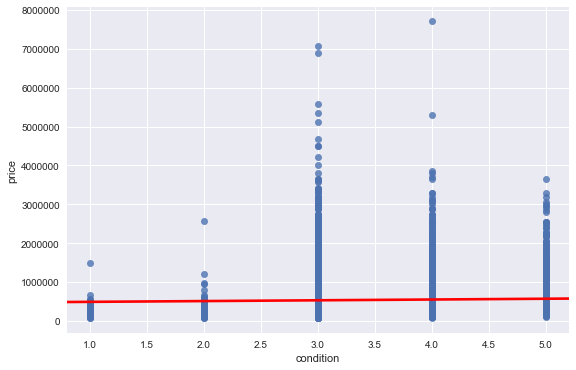

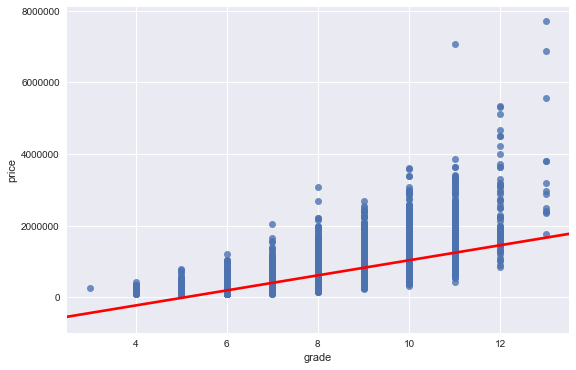

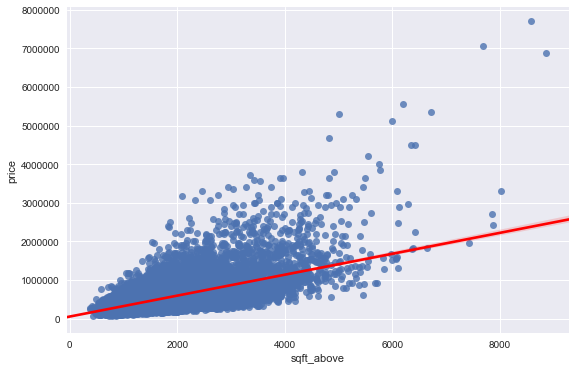

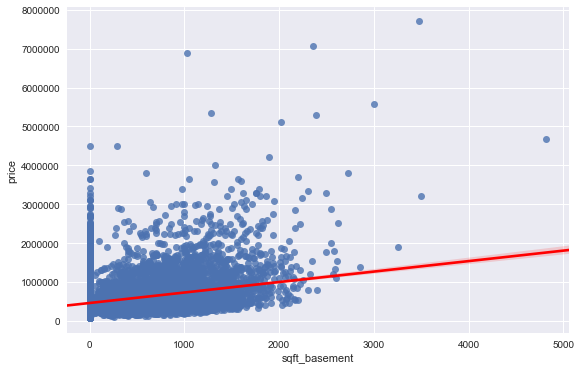

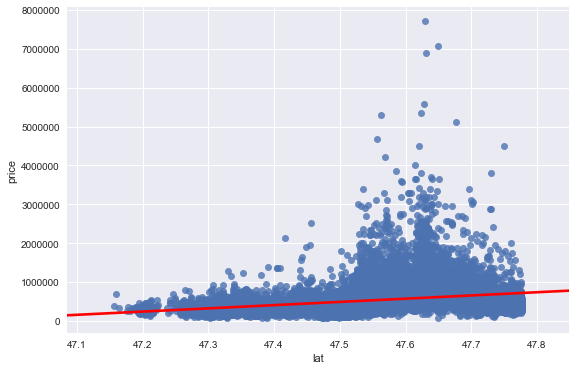

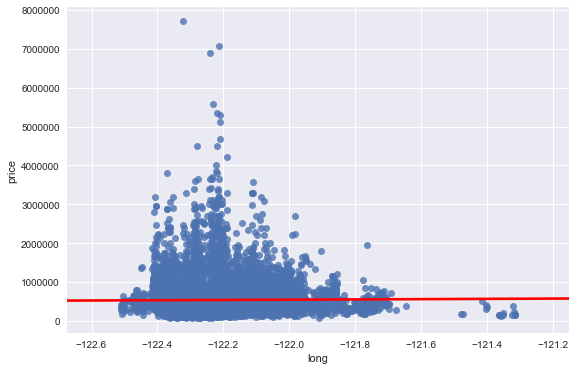

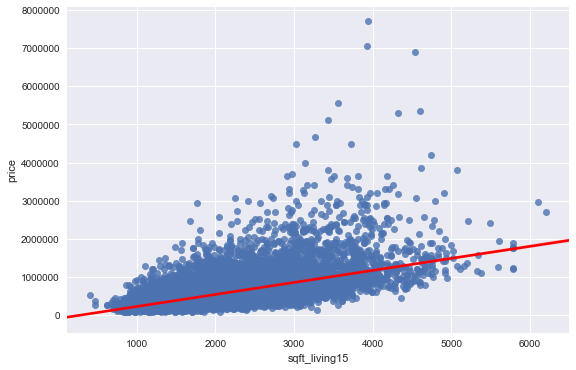

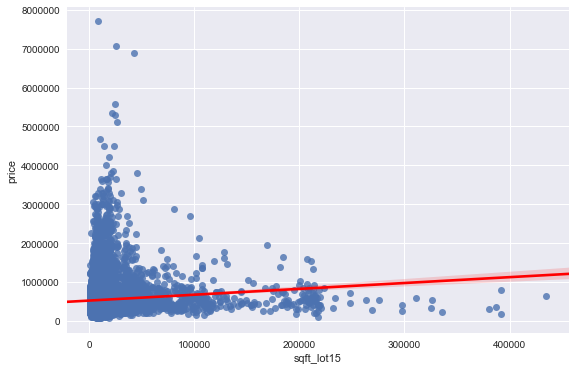

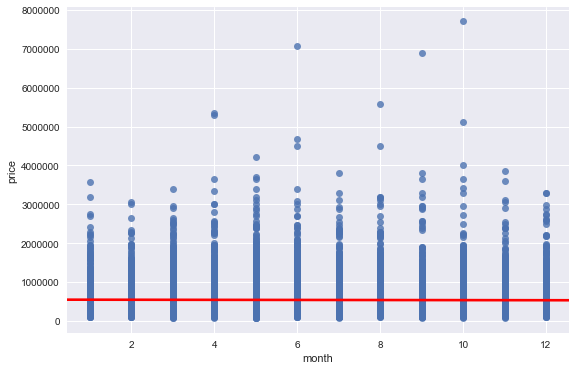

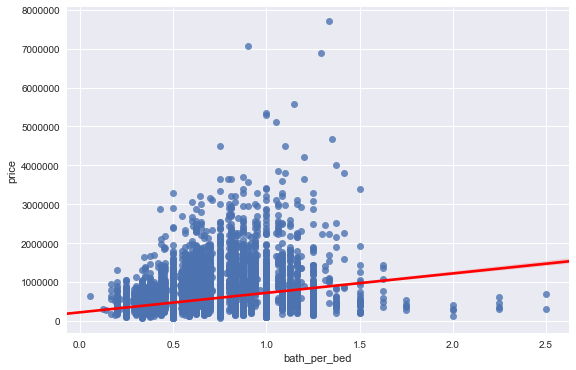

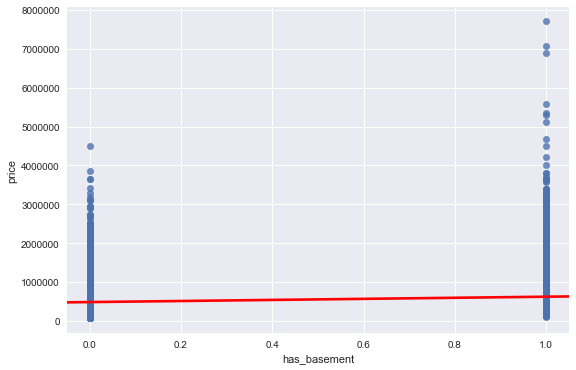

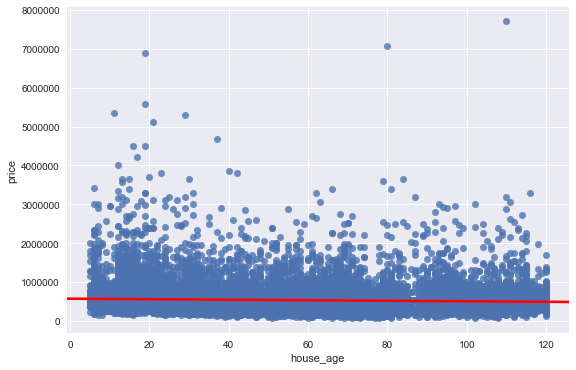

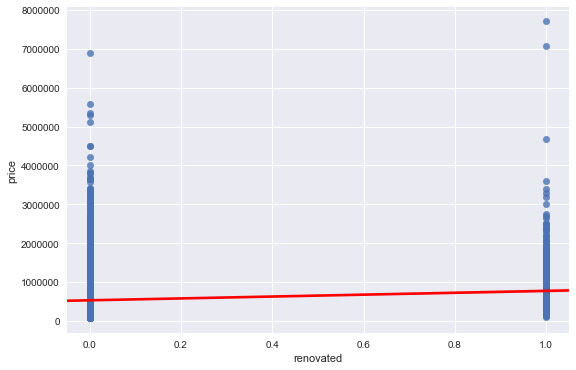

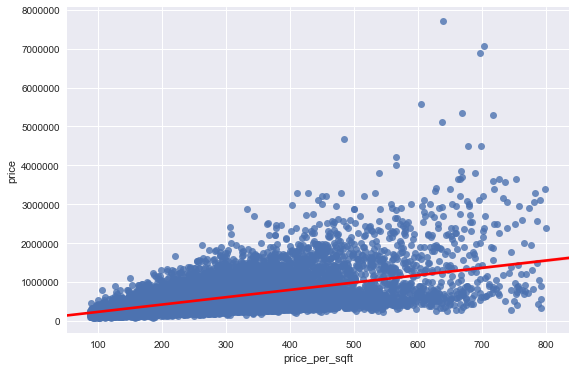

In [110]:
#getting all numerical columns in df
for col in kc_clean.describe().columns:
    plt.figure(figsize=(9,6))
    sns.regplot(data=kc_clean, x=col, y='price', line_kws={'color': 'red'})

In [111]:
pd.DataFrame(kc_clean.corr()['price']).sort_values(by='price',ascending=False)

price
price           1.000000
sqft_living     0.701991
grade           0.666973
sqft_above      0.602473
sqft_living15   0.584590
price_per_sqft  0.563504
bathrooms       0.523608
view            0.357022
sqft_basement   0.322895
lat             0.311251
bedrooms        0.307952
bath_per_bed    0.283479
waterfront      0.267153
floors          0.264694
has_basement    0.182697
renovated       0.120049
sqft_lot        0.108235
sqft_lot15      0.080068
condition       0.035466
long            0.013110
month          -0.010174
house_age      -0.052713

### Answer for Question 1: 
- these scatterplots and correlation for each continuous variable when compared to price show us which are linearly related to price.
- It also gives us a good indication as to which aspects of a house we want to focus on for our models.

# EXPLORE

## Zipcode DataFrame

### Creating the continuous and categorical dataframes

In [112]:
kc_continuous = ['sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 
                 'bedrooms', 'bathrooms', 'floors', 'grade', 'condition', 'house_age', 'bath_per_bed', 'price']

kc_categorical = ['waterfront', 'renovated', 'view', 'zipcode', 'has_basement']

In [113]:
cont_df = kc_clean[kc_continuous]
cat_df = kc_clean[kc_categorical]

In [114]:
print(len(cat_df), len(cont_df))

20995 20995


In [115]:
cat_df.head(3)

waterfront  renovated  view zipcode  has_basement
id                                                           
7129300520           0          0     0   98178             0
6414100192           0          1     0   98125             1
5631500400           0          0     0   98028             0

In [116]:
cont_df.head(3)

sqft_above  sqft_living  ...  bath_per_bed     price
id                                   ...                        
7129300520        1180         1180  ...      0.333333  221900.0
6414100192        2170         2570  ...      0.750000  538000.0
5631500400         770          770  ...      0.500000  180000.0

[3 rows x 13 columns]

In [117]:
cont_df.describe()

sqft_above   sqft_living  ...  bath_per_bed         price
count  20995.000000  20995.000000  ...  20995.000000  2.099500e+04
mean    1789.394523   2082.657919  ...      0.637941  5.403582e+05
std      820.054789    907.354777  ...      0.209075  3.689172e+05
min      370.000000    370.000000  ...      0.053030  7.800000e+04
25%     1200.000000   1430.000000  ...      0.500000  3.200000e+05
50%     1570.000000   1920.000000  ...      0.625000  4.500000e+05
75%     2210.000000   2550.000000  ...      0.750000  6.450000e+05
max     8860.000000  12050.000000  ...      2.500000  7.700000e+06

[8 rows x 13 columns]

### Logging continuous variables

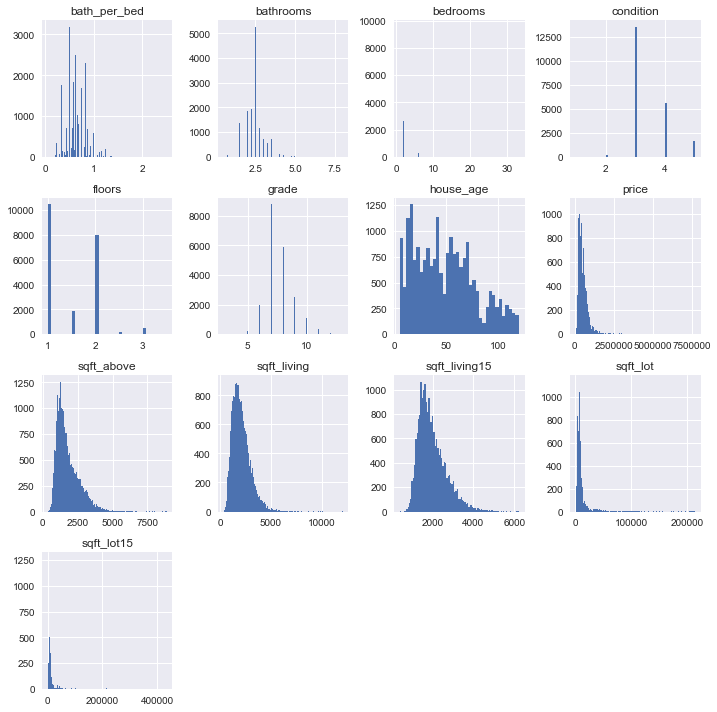

In [118]:
with plt.style.context('seaborn'):
    cont_df.hist(figsize=(10,10), bins='auto')
    plt.tight_layout();

#### Based on the above graphs, selecting columns I feel need to be normally distributed by logging them

In [119]:
unscaled_cont_cols = ['bedrooms', 'bathrooms', 'floors', 'grade', 'condition', 'house_age', 'bath_per_bed']
selected_log_cols = ['price', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']

In [120]:
for col in selected_log_cols:
    cont_df[f'{col}_log'] = cont_df[col].map(lambda x: np.log(x))

In [121]:
cont_df.describe()

sqft_above   sqft_living  ...  sqft_lot_log  sqft_lot15_log
count  20995.000000  20995.000000  ...  20995.000000    20995.000000
mean    1789.394523   2082.657919  ...      8.976305        8.950641
std      820.054789    907.354777  ...      0.806635        0.747322
min      370.000000    370.000000  ...      6.920672        6.478510
25%     1200.000000   1430.000000  ...      8.536604        8.540910
50%     1570.000000   1920.000000  ...      8.937875        8.938532
75%     2210.000000   2550.000000  ...      9.263692        9.212139
max     8860.000000  12050.000000  ...     12.269085       12.982476

[8 rows x 19 columns]

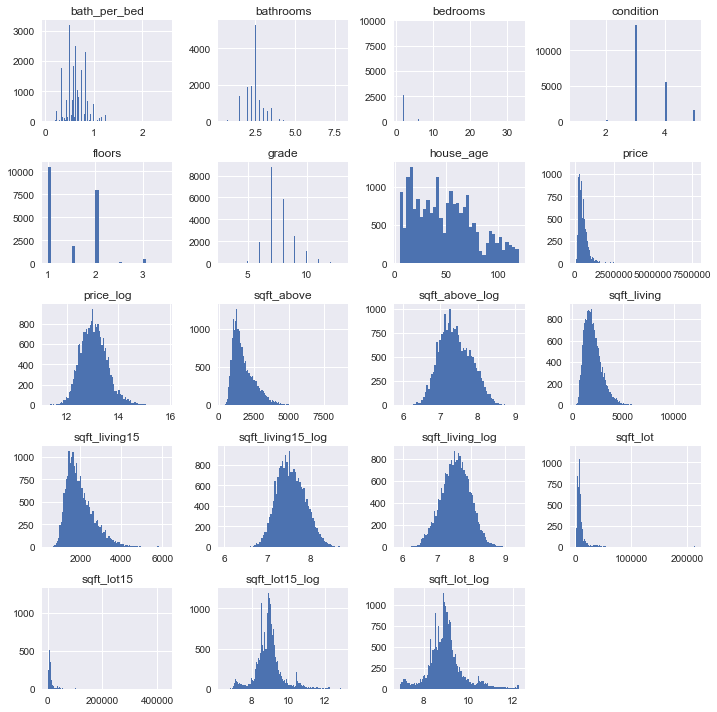

In [122]:
with plt.style.context('seaborn'):
    cont_df.hist(figsize=(10,10), bins='auto')
    plt.tight_layout();

In [123]:
cont_df.head(3)

sqft_above  sqft_living  ...  sqft_lot_log  sqft_lot15_log
id                                   ...                              
7129300520        1180         1180  ...      8.639411        8.639411
6414100192        2170         2570  ...      8.887653        8.941022
5631500400         770          770  ...      9.210340        8.994917

[3 rows x 19 columns]

### Creating a new Dataframe using selected columns

#### We will be using zipcodes and subregions to determine if location is a significant factor when determining price, so we will not need 'long' and 'lat' columns

In [124]:
select_df = cont_df[['price_log', 'sqft_above_log', 'sqft_living_log', 
                     'sqft_living15_log', 'sqft_lot_log','sqft_lot15_log', 'bedrooms', 'bathrooms', 'bath_per_bed', 
                     'floors', 'grade', 'condition', 'house_age']]
                       

In [125]:
select_df.head(3)

price_log  sqft_above_log  ...  condition  house_age
id                                     ...                      
7129300520  12.309982        7.073270  ...          3         65
6414100192  13.195614        7.682482  ...          3         69
5631500400  12.100712        6.646391  ...          3         87

[3 rows x 13 columns]

### Z-scoring continuous variables (excluding price)

In [126]:
def zscore(df):
    """
    Definition:
    Uses the StandardScaler() class from sklearn.preprocessing to scale numerical data of the 
    selected dataframe by z-scoring the data.
    
    Args:
    df = chosen dataframe. Must have all numerical values.
    
    Returns:
    a dataframe containing the scaled data    
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df.values)
    print(scaled_data.shape)
    select_scaled = pd.DataFrame(data=scaled_data, index=df.index, columns=df.columns)
    return select_scaled

In [127]:
select_scaled_df = zscore(select_df)

(20995, 13)


In [128]:
select_scaled_df.describe().round(3)

price_log  sqft_above_log  ...  condition  house_age
count  20995.000       20995.000  ...  20995.000  20995.000
mean       0.000          -0.000  ...     -0.000      0.000
std        1.000           1.000  ...      1.000      1.000
min       -3.376          -3.490  ...     -3.704     -1.514
25%       -0.703          -0.722  ...     -0.638     -0.866
50%       -0.058          -0.089  ...     -0.638     -0.116
75%        0.624           0.715  ...      0.895      0.668
max        5.320           3.983  ...      2.428      2.407

[8 rows x 13 columns]

In [129]:
select_scaled_df.head(3)

price_log  sqft_above_log  ...  condition  house_age
id                                     ...                      
7129300520  -1.396379       -0.761202  ...  -0.637969   0.531970
6414100192   0.280619        0.672297  ...  -0.637969   0.668363
5631500400  -1.792645       -1.765663  ...  -0.637969   1.282131

[3 rows x 13 columns]

#### Adding 'price' column from our cleaned DF to our scaled DF

In [130]:
select_scaled_df['price'] = kc_clean['price']

In [131]:
select_scaled_df.isna().sum()

price_log            0
sqft_above_log       0
sqft_living_log      0
sqft_living15_log    0
sqft_lot_log         0
sqft_lot15_log       0
bedrooms             0
bathrooms            0
bath_per_bed         0
floors               0
grade                0
condition            0
house_age            0
price                0
dtype: int64

### One Hot Encoding categorical columns

In [132]:
cat_df = pd.get_dummies(cat_df, drop_first=True)

In [133]:
cat_df.head(3)

waterfront  renovated  ...  zipcode_98198  zipcode_98199
id                                 ...                              
7129300520           0          0  ...              0              0
6414100192           0          1  ...              0              0
5631500400           0          0  ...              0              0

[3 rows x 73 columns]

### Merging scaled continuous cols with ohe dummy columns

In [134]:
merge_selected = pd.concat([select_scaled_df, cat_df], axis=1)

In [135]:
merge_selected.head(3)

price_log  sqft_above_log  ...  zipcode_98198  zipcode_98199
id                                     ...                              
7129300520  -1.396379       -0.761202  ...              0              0
6414100192   0.280619        0.672297  ...              0              0
5631500400  -1.792645       -1.765663  ...              0              0

[3 rows x 87 columns]

In [136]:
merge_selected.isna().sum()

price_log            0
sqft_above_log       0
sqft_living_log      0
sqft_living15_log    0
sqft_lot_log         0
                    ..
zipcode_98177        0
zipcode_98178        0
zipcode_98188        0
zipcode_98198        0
zipcode_98199        0
Length: 87, dtype: int64

In [137]:
num_cols = merge_selected.drop('price', axis=1).columns

for col in num_cols:
    merge_selected = merge_selected.loc[merge_selected[f'{col}'] <= 3]
    merge_selected = merge_selected.loc[merge_selected[f'{col}'] >= -3]

In [138]:
merge_selected.describe()

price_log  sqft_above_log  ...  zipcode_98198  zipcode_98199
count  20027.000000    20027.000000  ...   20027.000000   20027.000000
mean      -0.041408       -0.039633  ...       0.013482       0.015080
std        0.937483        0.955620  ...       0.115329       0.121873
min       -2.973117       -2.877718  ...       0.000000       0.000000
25%       -0.703157       -0.741345  ...       0.000000       0.000000
50%       -0.074498       -0.119434  ...       0.000000       0.000000
75%        0.579539        0.661428  ...       0.000000       0.000000
max        2.998376        2.948839  ...       1.000000       1.000000

[8 rows x 87 columns]

In [139]:
len(merge_selected)

20027

In [140]:
zipcode_model = merge_selected

In [141]:
zipcode_model.to_csv('zipcode_df.csv')

In [142]:
zipcode_model.head(3)

price_log  sqft_above_log  ...  zipcode_98198  zipcode_98199
id                                     ...                              
7129300520  -1.396379       -0.761202  ...              0              0
6414100192   0.280619        0.672297  ...              0              0
5631500400  -1.792645       -1.765663  ...              0              0

[3 rows x 87 columns]

In [143]:
if len(zipcode_model.columns) > 20:
    pass
else:
    zipcode_model.hist(figsize=(10,10))
    plt.tight_layout();

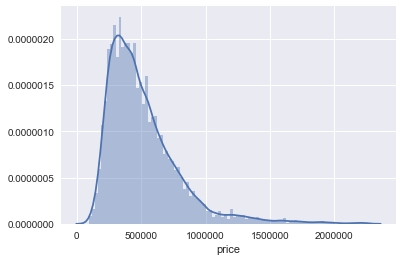

In [144]:
sns.distplot(zipcode_model['price'], bins='auto')

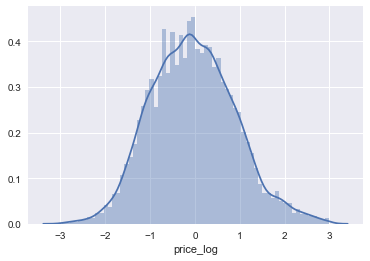

In [145]:
sns.distplot(zipcode_model['price_log'], bins='auto')

In [146]:
if len(zipcode_model.columns) > 20:
    pass
else:
    cols = zipcode_model.describe().columns
    for col in cols:
        plt.figure(figsize=(10,5))
        sns.regplot(data=zipcode_model, x=col, y='price')

### Constructing a heatmap to compare columns

In [147]:
def heat_collinearity(corr, figsize=(12,12)):
    """
    Definition:
    Shows the bottom triangle of a heat correlation
    
    Args:
    corr = corr() function - usually obtained from the outside function heat_corr()
    figsize = default = (12,12)
    
    Returns:
    A heat map
    """
    fig, ax = plt.subplots(figsize=figsize)
    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True
    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=True, square=True, mask=mask, cmap='Reds', ax=ax)
    ax.set_ylim(len(corr.columns), 0);
    return fig, ax

In [148]:
def heat_corr(df, target_cols, figsize=(12,12)):
    """
    Definition:
    Creates a corr() of a dataframe and places the corr() within the heat_collinearity() function.
    If the amount of columns is > 50, figsize will change into (50,50)
    
    Args:
    df = selected dataframe
    target_cols = all continuous variables you wish to correlate
    figsize = default is (12,12)
    
    Returns:
    A heat map
    """
    corr = abs(df[target_cols].corr().round(2))
    if len(target_cols) > 50:
        heat_collinearity(corr, figsize=(50,50))
    else:
        heat_collinearity(corr, figsize=(12,12))

In [149]:
zipcode_model.head(1)

price_log  sqft_above_log  ...  zipcode_98198  zipcode_98199
id                                     ...                              
7129300520  -1.396379       -0.761202  ...              0              0

[1 rows x 87 columns]

In [150]:
cont_vars = list(zipcode_model.columns[:13])
cont_vars

['price_log',
 'sqft_above_log',
 'sqft_living_log',
 'sqft_living15_log',
 'sqft_lot_log',
 'sqft_lot15_log',
 'bedrooms',
 'bathrooms',
 'bath_per_bed',
 'floors',
 'grade',
 'condition',
 'house_age']

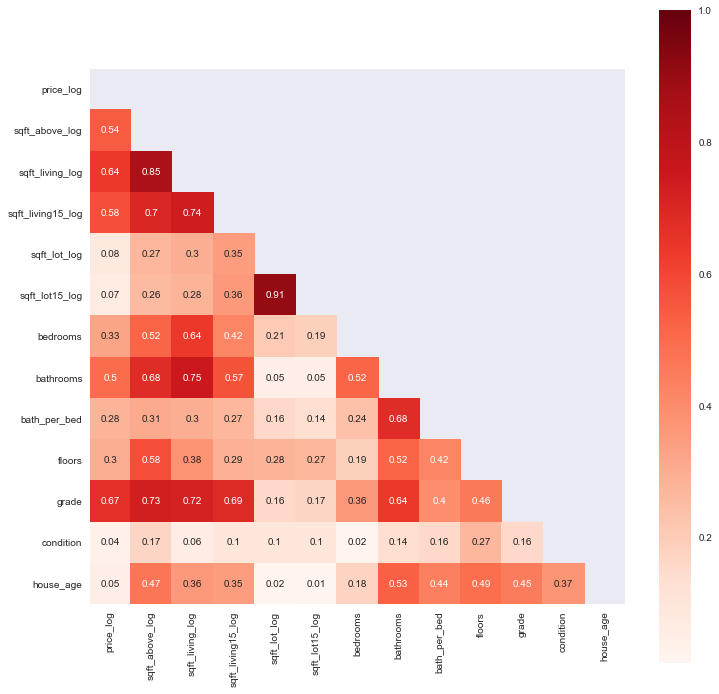

<Figure size 864x864 with 0 Axes>

In [151]:
heat_corr(zipcode_model, target_cols=cont_vars)

In [152]:
zipcode_model.drop('sqft_above_log', axis=1, inplace=True)
cont_vars.remove('sqft_above_log')

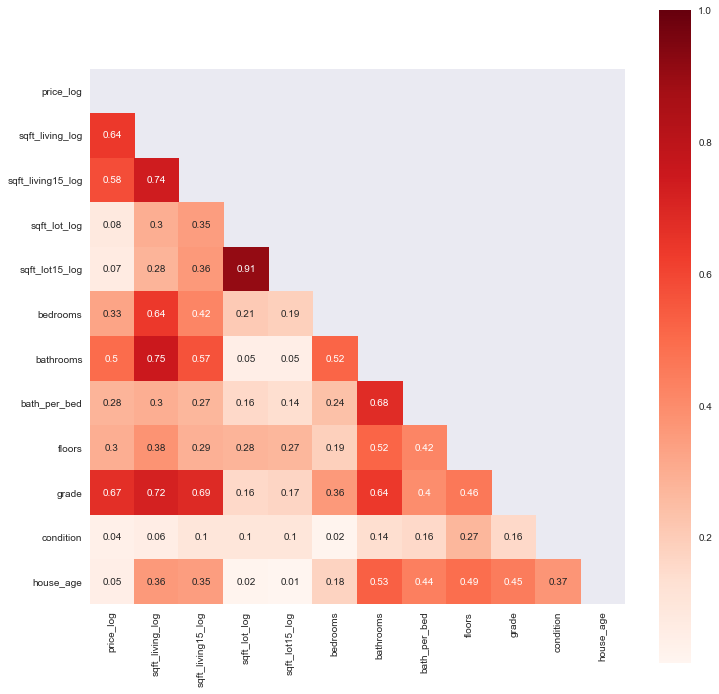

<Figure size 864x864 with 0 Axes>

In [153]:
heat_corr(zipcode_model, target_cols=cont_vars)

In [154]:
zipcode_model.drop('sqft_lot15_log', axis=1, inplace=True)
cont_vars.remove('sqft_lot15_log')

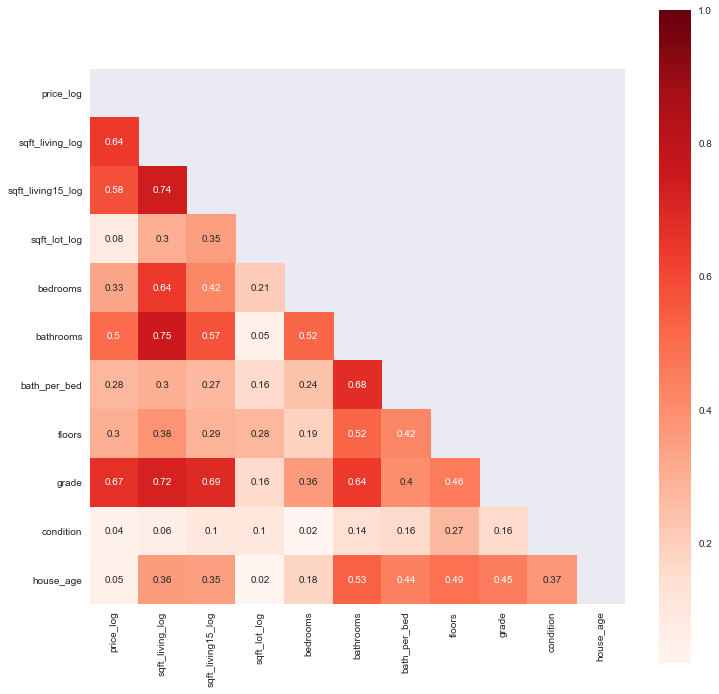

<Figure size 864x864 with 0 Axes>

In [155]:
heat_corr(zipcode_model, cont_vars)

In [156]:
zipcode_model.drop('bathrooms', axis=1, inplace=True)
cont_vars.remove('bathrooms')

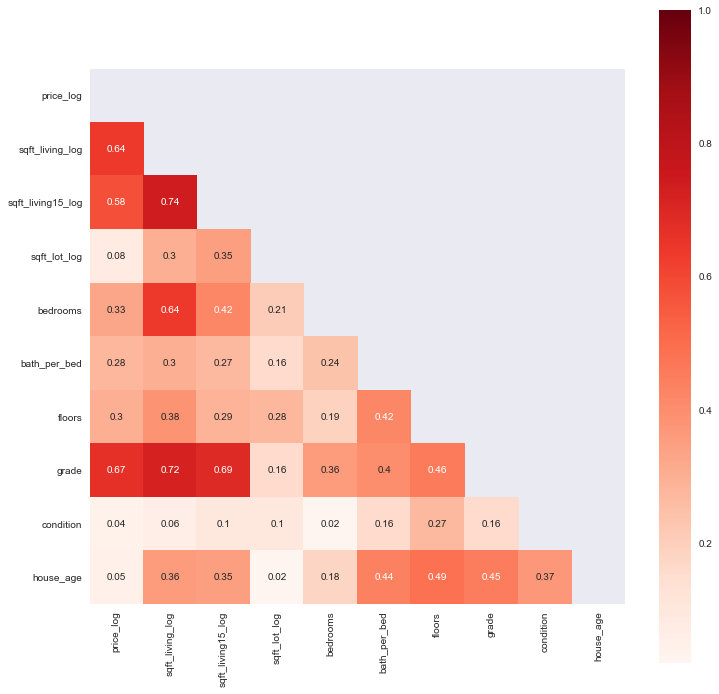

<Figure size 864x864 with 0 Axes>

In [157]:
heat_corr(zipcode_model, cont_vars)

In [158]:
len(zipcode_model.columns)

84

In [159]:
if len(zipcode_model.columns) > 20:
    pass
else:
    with plt.style.context('seaborn'):
        zipcode_model.hist(figsize=(10,10))
        plt.tight_layout();

## Subregion DataFrame

In [160]:
select_scaled_df.head(3)

price_log  sqft_above_log  ...  house_age     price
id                                     ...                     
7129300520  -1.396379       -0.761202  ...   0.531970  221900.0
6414100192   0.280619        0.672297  ...   0.668363  538000.0
5631500400  -1.792645       -1.765663  ...   1.282131  180000.0

[3 rows x 14 columns]

### One Hot Encoding Categorical Data for Subregion Dataframe

In [161]:
cat_df2 = kc_clean[['waterfront', 'renovated', 'view', 'has_basement', 'subregion']]

In [162]:
cat_df2.head(3)

waterfront  renovated  view  has_basement    subregion
id                                                                
7129300520           0          0     0             0  south_urban
6414100192           0          1     0             1      seattle
5631500400           0          0     0             0        north

In [163]:
cat_df2 = pd.get_dummies(cat_df2, drop_first=True)

In [164]:
cat_df2.head(3)

waterfront  ...  subregion_vashon_island
id                      ...                         
7129300520           0  ...                        0
6414100192           0  ...                        0
5631500400           0  ...                        0

[3 rows x 12 columns]

### adding lat and long so I can use them later in Tableau

In [165]:
merge_selected2 = pd.concat([select_scaled_df, kc_clean[['lat', 'long']], cat_df2], axis=1)

In [166]:
merge_selected2.head(3)

price_log  ...  subregion_vashon_island
id                     ...                         
7129300520  -1.396379  ...                        0
6414100192   0.280619  ...                        0
5631500400  -1.792645  ...                        0

[3 rows x 28 columns]

In [167]:
merge_selected2.isna().sum()

price_log                      0
sqft_above_log                 0
sqft_living_log                0
sqft_living15_log              0
sqft_lot_log                   0
sqft_lot15_log                 0
bedrooms                       0
bathrooms                      0
bath_per_bed                   0
floors                         0
grade                          0
condition                      0
house_age                      0
price                          0
lat                            0
long                           0
waterfront                     0
renovated                      0
view                           0
has_basement                   0
subregion_east_urban           0
subregion_north                0
subregion_north_and_seattle    0
subregion_seattle              0
subregion_south_and_seattle    0
subregion_south_rural          0
subregion_south_urban          0
subregion_vashon_island        0
dtype: int64

In [168]:
num_cols = merge_selected2.drop(['price', 'lat', 'long'], axis=1).columns

for col in num_cols:
    merge_selected2 = merge_selected2.loc[merge_selected2[f'{col}'] <= 3]
    merge_selected2 = merge_selected2.loc[merge_selected2[f'{col}'] >= -3]

In [169]:
merge_selected2.describe()

price_log  ...  subregion_vashon_island
count  20027.000000  ...             20027.000000
mean      -0.041408  ...                 0.003096
std        0.937483  ...                 0.055555
min       -2.973117  ...                 0.000000
25%       -0.703157  ...                 0.000000
50%       -0.074498  ...                 0.000000
75%        0.579539  ...                 0.000000
max        2.998376  ...                 1.000000

[8 rows x 28 columns]

In [170]:
subregion_model = merge_selected2

In [171]:
subregion_model.to_csv('subregion_df.csv')

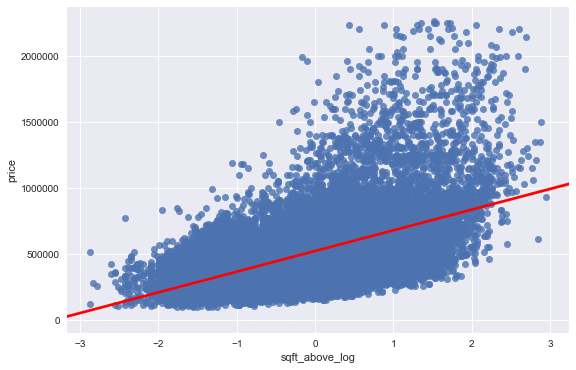

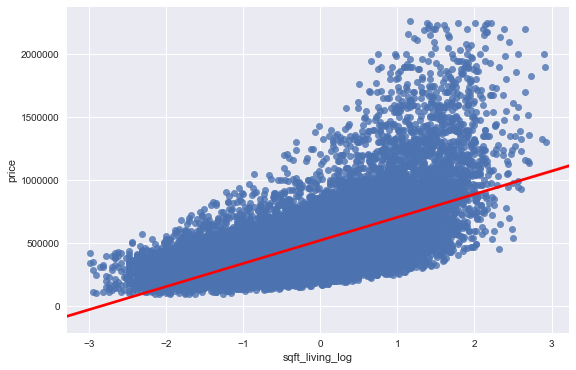

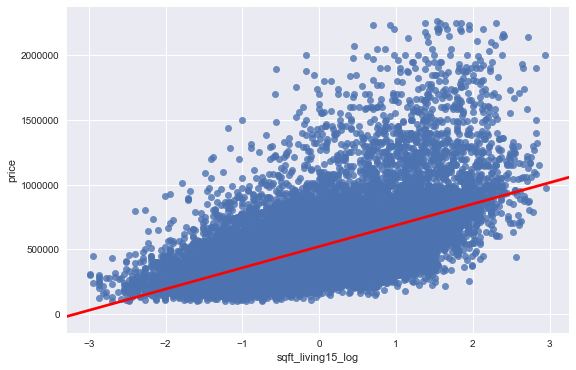

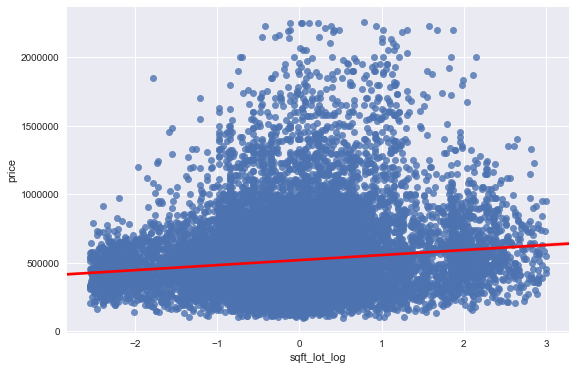

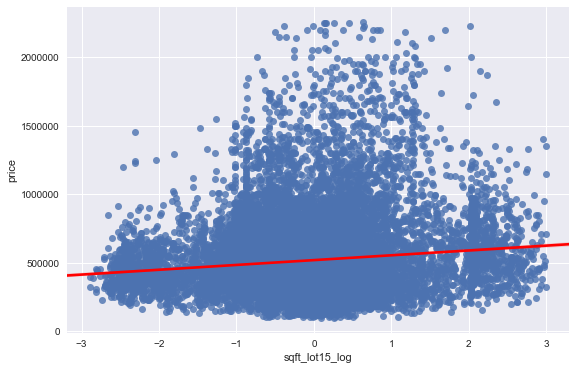

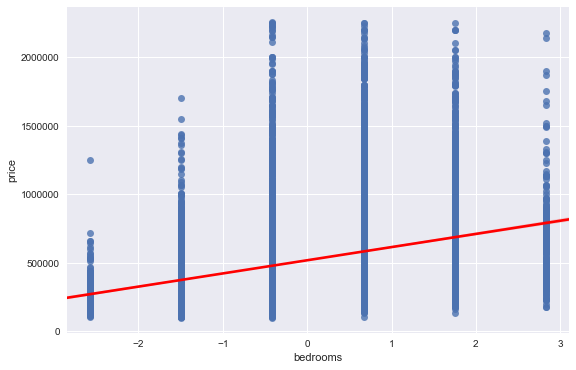

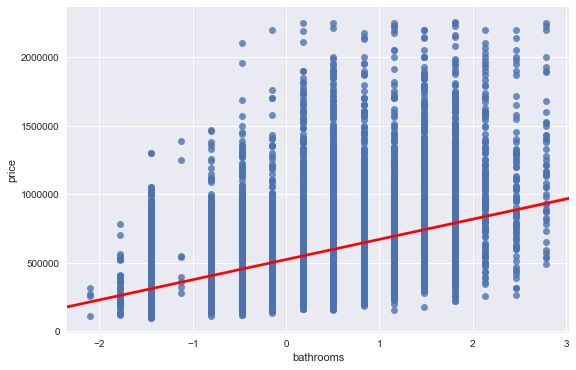

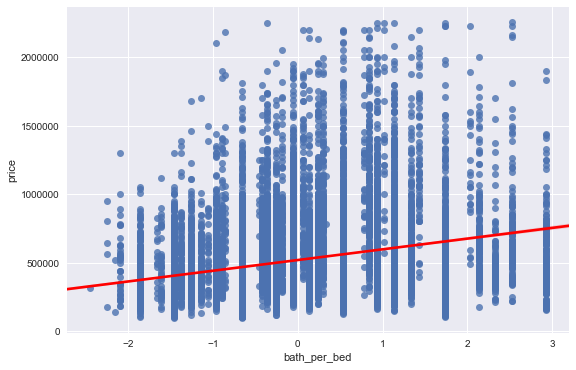

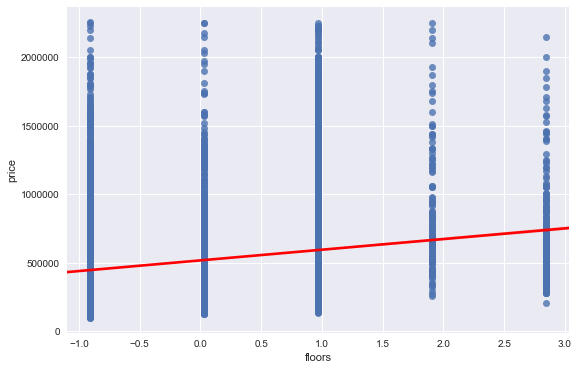

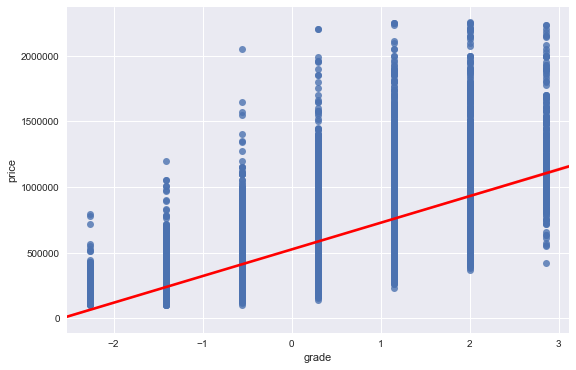

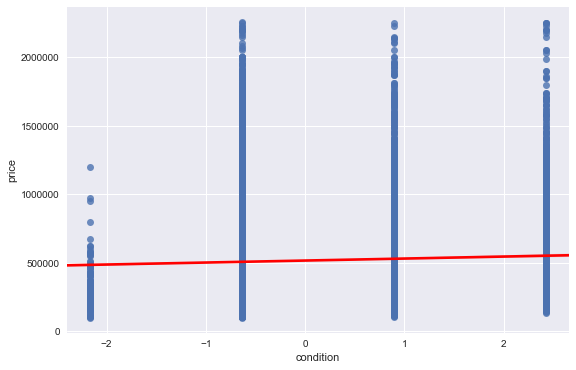

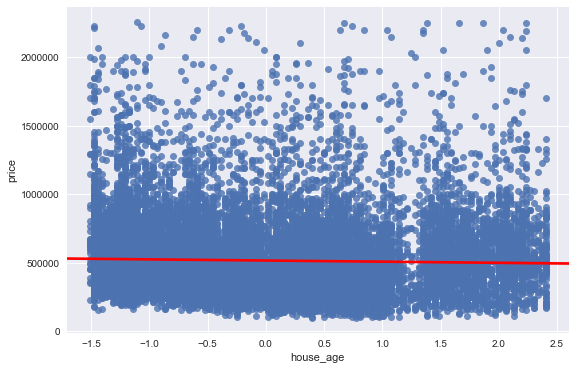

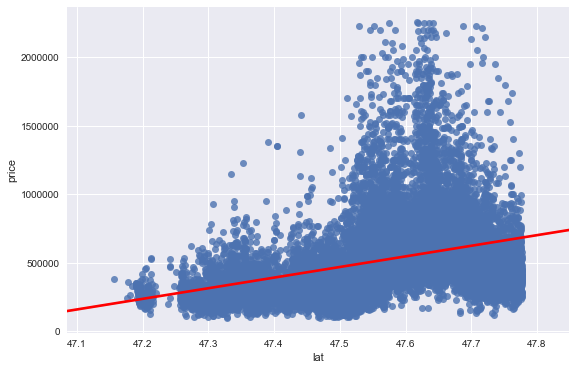

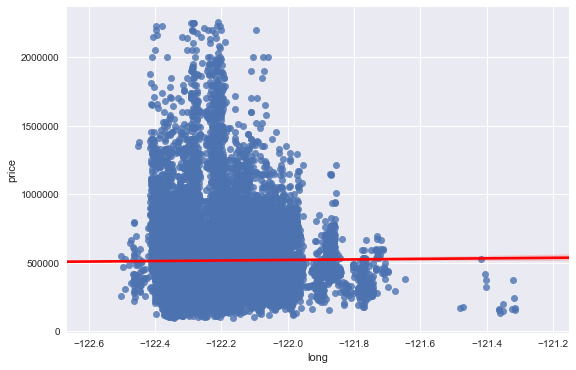

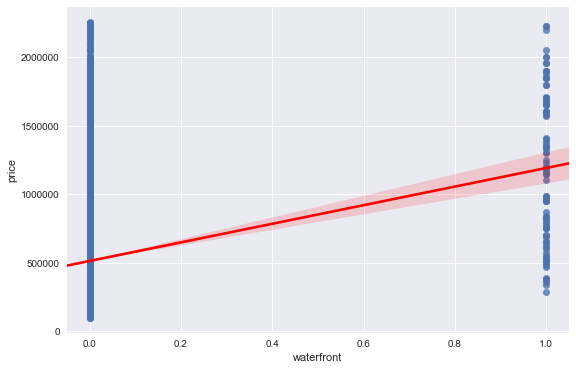

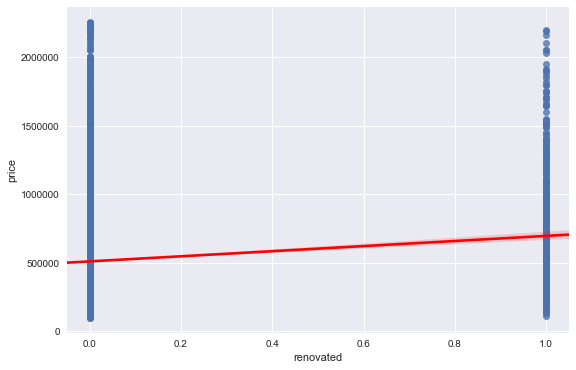

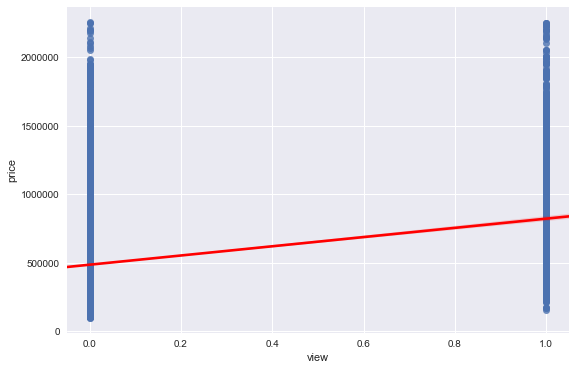

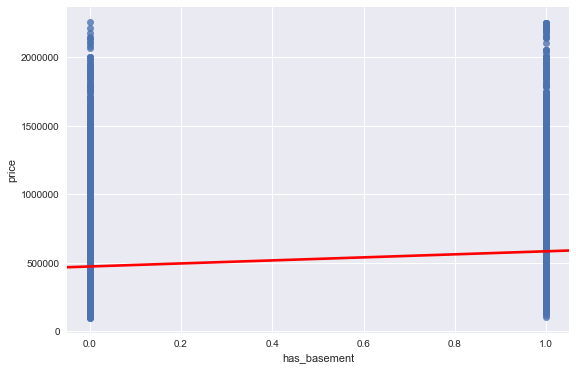

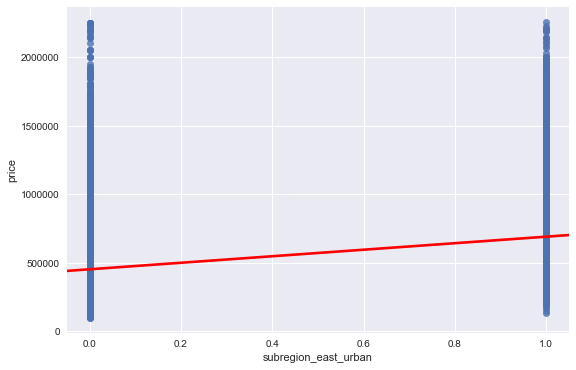

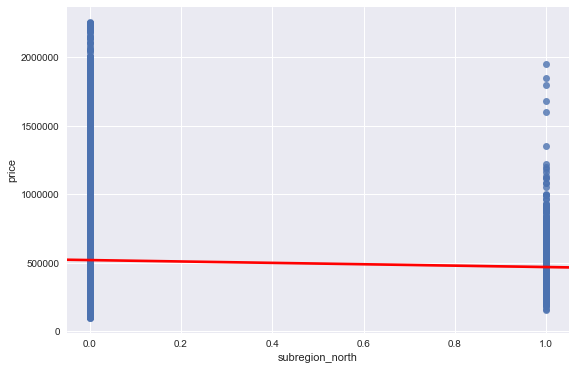

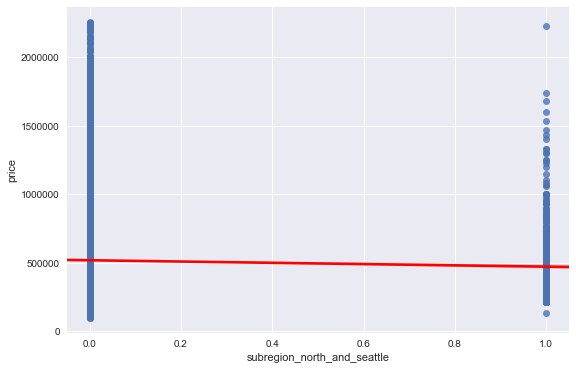

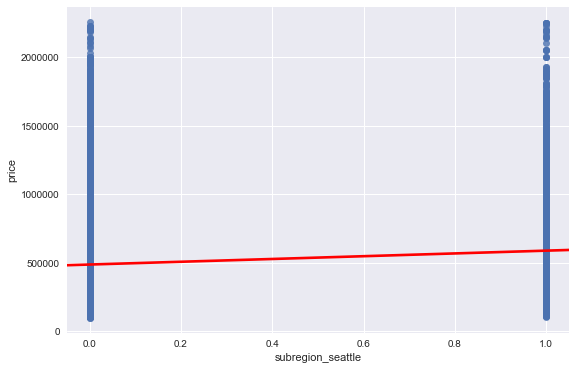

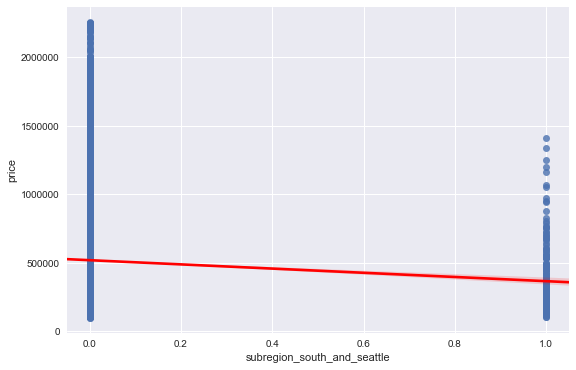

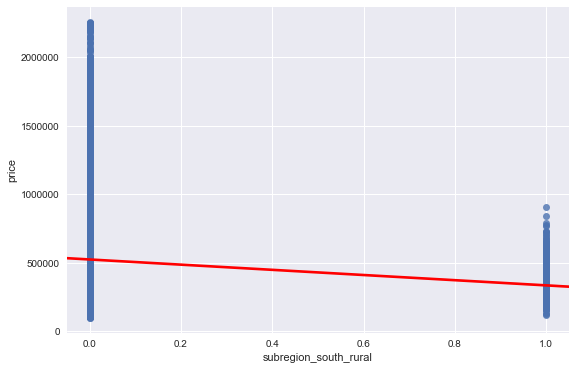

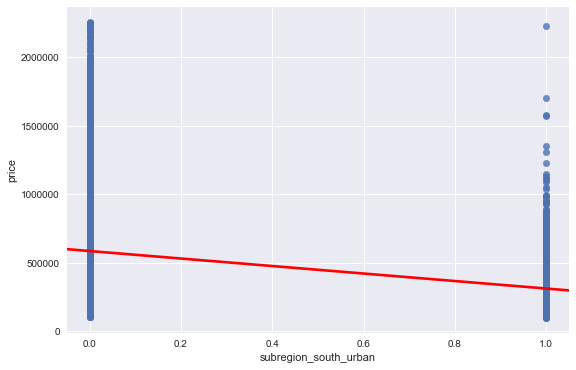

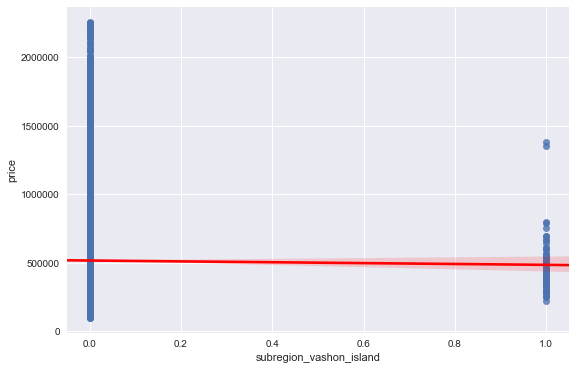

In [172]:
for col in subregion_model.drop(['price', 'price_log'], axis=1).columns:
    plt.figure(figsize=(9,6))
    sns.regplot(data=subregion_model, x=col, y='price', line_kws={'color': 'red'})

### NonTransformed DataFrame

In [173]:
nontransform_df = subregion_model.iloc[:, 6:].copy()

In [174]:
for col in nontransform_df.columns:
    try:
        nontransform_df[col] = kc_clean[col]
    except:
        continue

In [175]:
nontransform_df.describe()

bedrooms  ...  subregion_vashon_island
count  20027.000000  ...             20027.000000
mean       3.363509  ...                 0.003096
std        0.852196  ...                 0.055555
min        1.000000  ...                 0.000000
25%        3.000000  ...                 0.000000
50%        3.000000  ...                 0.000000
75%        4.000000  ...                 0.000000
max        6.000000  ...                 1.000000

[8 rows x 22 columns]

In [176]:
nontransform_df['sqft_living'] = kc_clean['sqft_living']
nontransform_df['sqft_living15'] = kc_clean['sqft_living15']

In [177]:
nontransform_df['sqft_lot'] = kc_clean['sqft_lot']
nontransform_df['sqft_lot15'] = kc_clean['sqft_lot15']

In [178]:
nontransform_df.describe()

bedrooms    bathrooms  ...      sqft_lot    sqft_lot15
count  20027.000000  20027.00000  ...  20027.000000  20027.000000
mean       3.363509      2.07586  ...   9806.036001   9160.546562
std        0.852196      0.70922  ...   9685.006975   8105.657967
min        1.000000      0.50000  ...   1013.000000    886.000000
25%        3.000000      1.50000  ...   5028.500000   5100.000000
50%        3.000000      2.25000  ...   7500.000000   7520.000000
75%        4.000000      2.50000  ...  10137.000000   9760.000000
max        6.000000      4.25000  ...  88909.000000  72513.000000

[8 rows x 26 columns]

In [179]:
nontransform_df['price_log'] = nontransform_df['price'].map(lambda x: np.log(x))

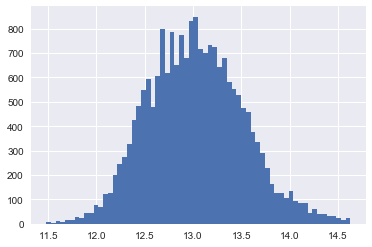

In [180]:
nontransform_df['price_log'].hist(bins='auto')

In [181]:
nontransform_df.to_csv('nontransform.csv')

In [182]:
nontransform_df = pd.read_csv('nontransform.csv')

### Graphs For Presentation

Text(0, 0.5, 'Sqft Living Area')

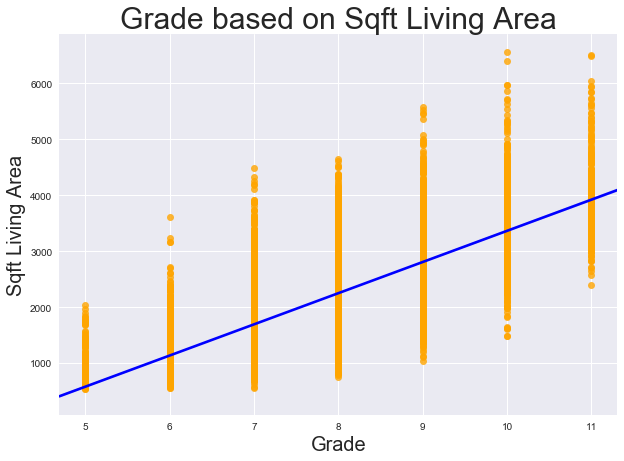

In [183]:
fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(data=nontransform_df, x='grade', y='sqft_living', ax=ax, color='orange', line_kws={'color': 'blue'})
ax.set_title('Grade based on Sqft Living Area', fontsize=30)
ax.set_xlabel('Grade', fontsize=20)
ax.set_ylabel('Sqft Living Area', fontsize=20)

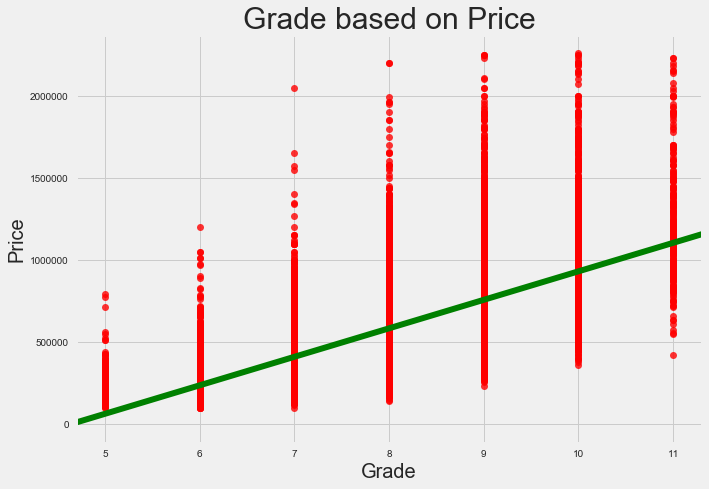

In [184]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(10,7))
    sns.regplot(data=nontransform_df, x='grade', y='price', ax=ax, color='red', line_kws={'color': 'green'})
    ax.set_title('Grade based on Price', fontsize=30)
    ax.set_xlabel('Grade', fontsize=20)
    ax.set_ylabel('Price', fontsize=20)

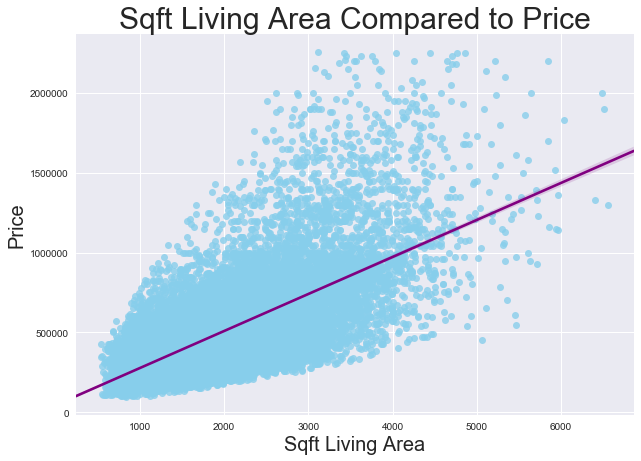

In [185]:
fig, ax = plt.subplots(figsize=(10,7))
sns.regplot(data=nontransform_df, x='sqft_living', y='price', ax=ax, color='skyblue', line_kws={'color': 'purple'})
ax.set_title('Sqft Living Area Compared to Price', fontsize=30)
ax.set_xlabel('Sqft Living Area', fontsize=20)
ax.set_ylabel('Price', fontsize=20);

In [186]:
nontransform_df[['price', 'sqft_living', 'grade']].corr()

price  sqft_living     grade
price        1.000000     0.658689  0.657289
sqft_living  0.658689     1.000000  0.742528
grade        0.657289     0.742528  1.000000

### Subregion Model Heatmap

In [187]:
def high_corr(cell_num):
    """
    Definition:
    Highlights cells within a correlation matrix that display a high correlation (above 0.75, below -0.75).
    Best used by: corr.style.applymap(high_corr)
    
    Args:
    cell_num = the cell number within a corr() function
    
    Returns:
    A correlation matrix with highlighted values greater than the absolute value of 0.75"""
    if cell_num <= -0.75:
        color = 'red'
    elif cell_num >= 0.75:
        color = 'red'
    else:
        color = 'black'
    return 'color: %s' % color

In [188]:
subregion_model.head(1)

price_log  ...  subregion_vashon_island
id                     ...                         
7129300520  -1.396379  ...                        0

[1 rows x 28 columns]

In [189]:
subregion_model.drop(['lat', 'long'], axis=1, inplace=True)

In [190]:
sub_vars = list(subregion_model.columns[:14])
sub_vars

['price_log',
 'sqft_above_log',
 'sqft_living_log',
 'sqft_living15_log',
 'sqft_lot_log',
 'sqft_lot15_log',
 'bedrooms',
 'bathrooms',
 'bath_per_bed',
 'floors',
 'grade',
 'condition',
 'house_age',
 'price']

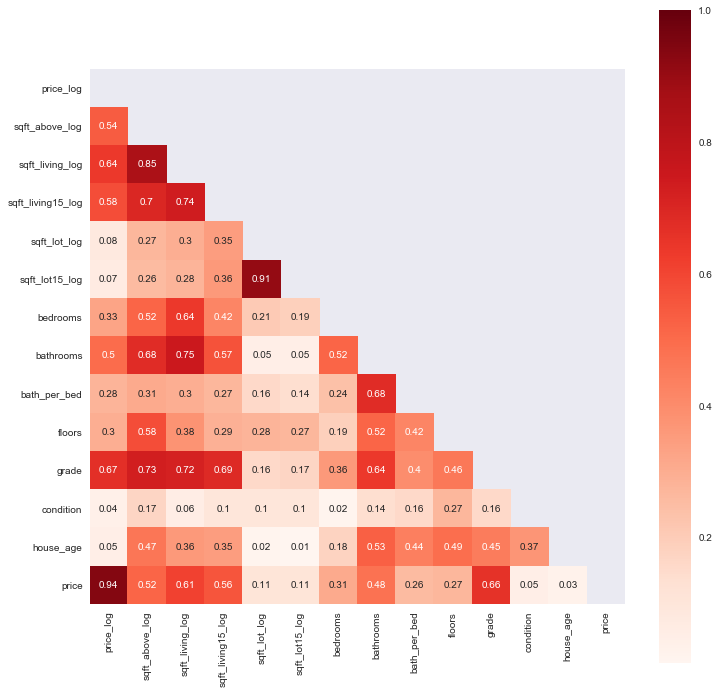

<Figure size 864x864 with 0 Axes>

In [191]:
heat_corr(subregion_model, sub_vars)

In [192]:
subregion_model.drop('sqft_lot15_log', axis=1, inplace=True)
sub_vars.remove('sqft_lot15_log')

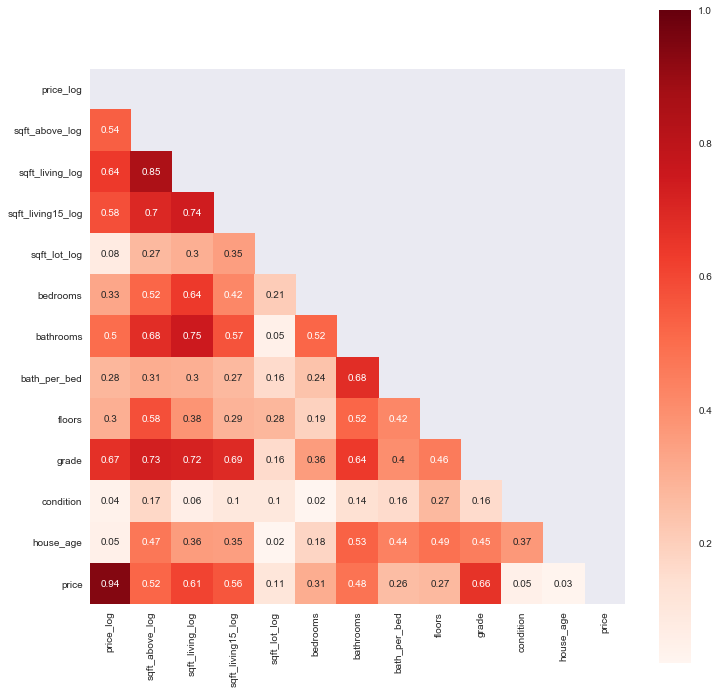

<Figure size 864x864 with 0 Axes>

In [193]:
heat_corr(subregion_model, sub_vars)

In [194]:
subregion_model.drop('sqft_above_log', axis=1, inplace=True)
sub_vars.remove('sqft_above_log')

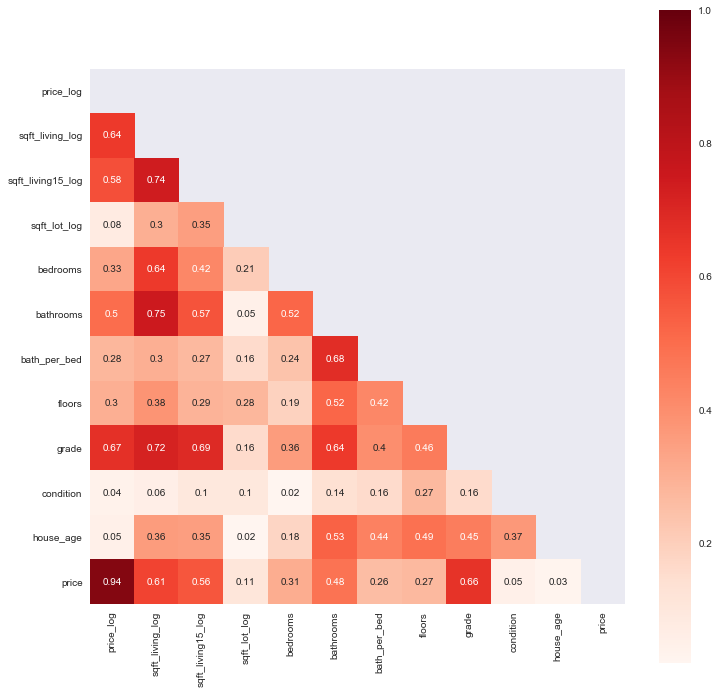

<Figure size 864x864 with 0 Axes>

In [195]:
heat_corr(subregion_model, sub_vars)

In [196]:
subregion_model.drop('bathrooms', axis=1, inplace=True)
sub_vars.remove('bathrooms')

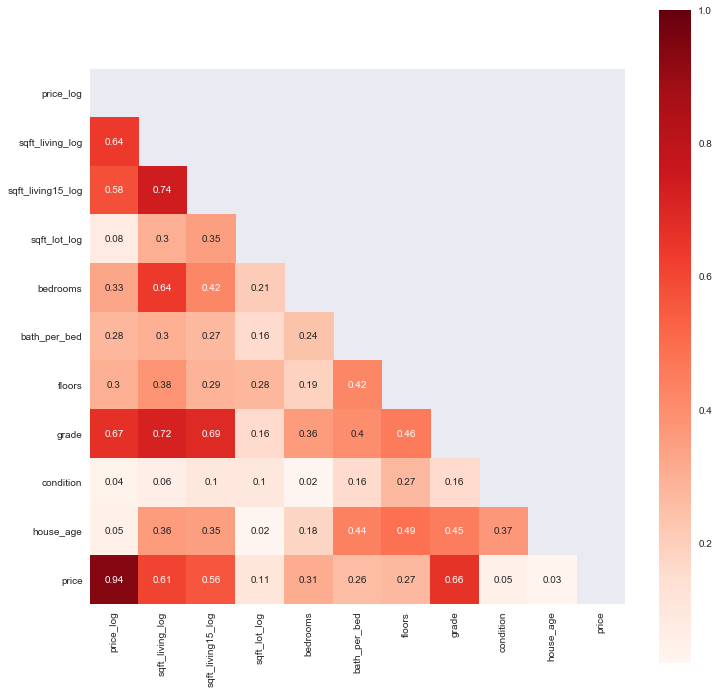

<Figure size 864x864 with 0 Axes>

In [197]:
heat_corr(subregion_model, sub_vars)

### NonTransformed DF Heatmap

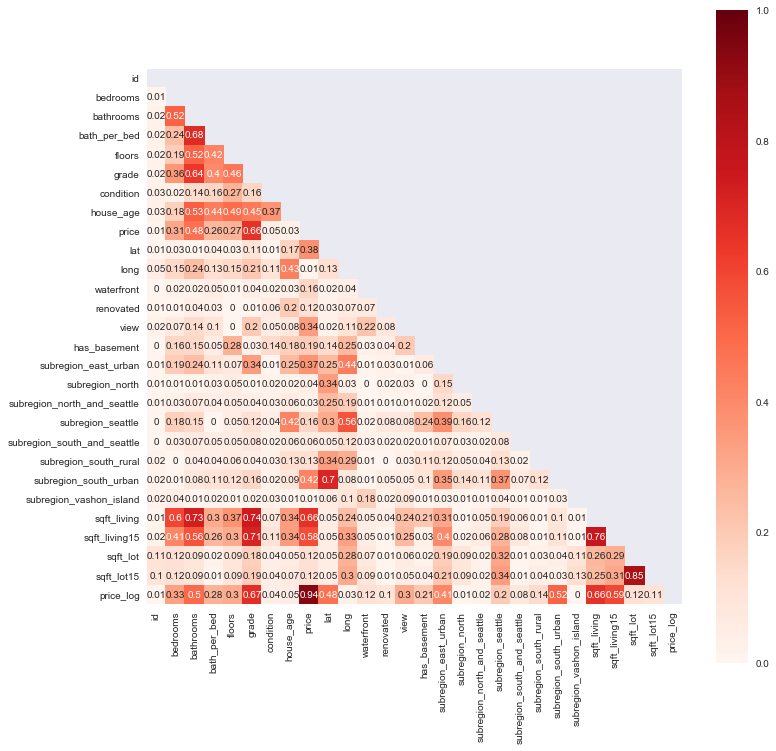

<Figure size 864x864 with 0 Axes>

In [198]:
heat_corr(nontransform_df, nontransform_df.columns)

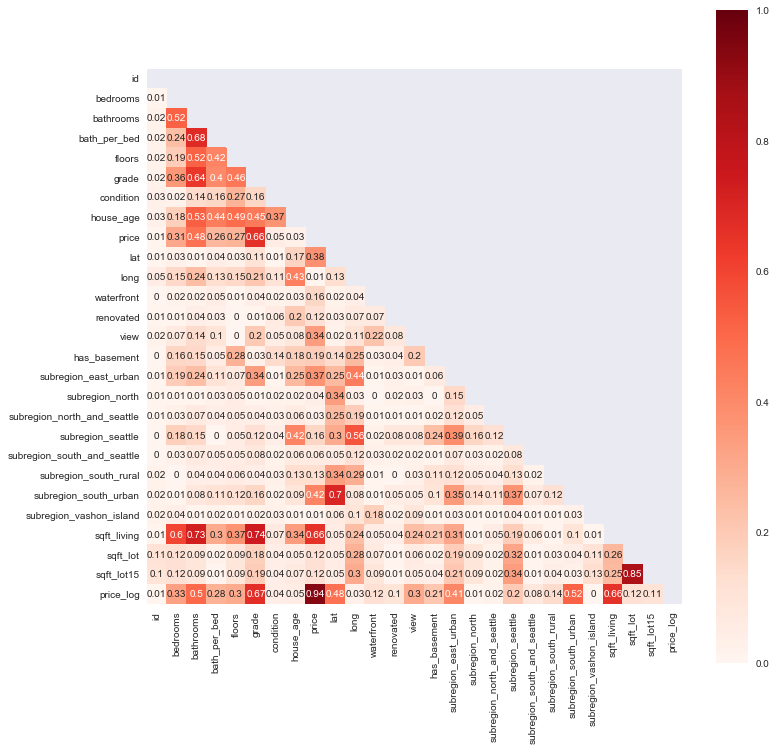

<Figure size 864x864 with 0 Axes>

In [199]:
nontransform_df.drop('sqft_living15', axis=1, inplace=True)
heat_corr(nontransform_df, nontransform_df.columns)

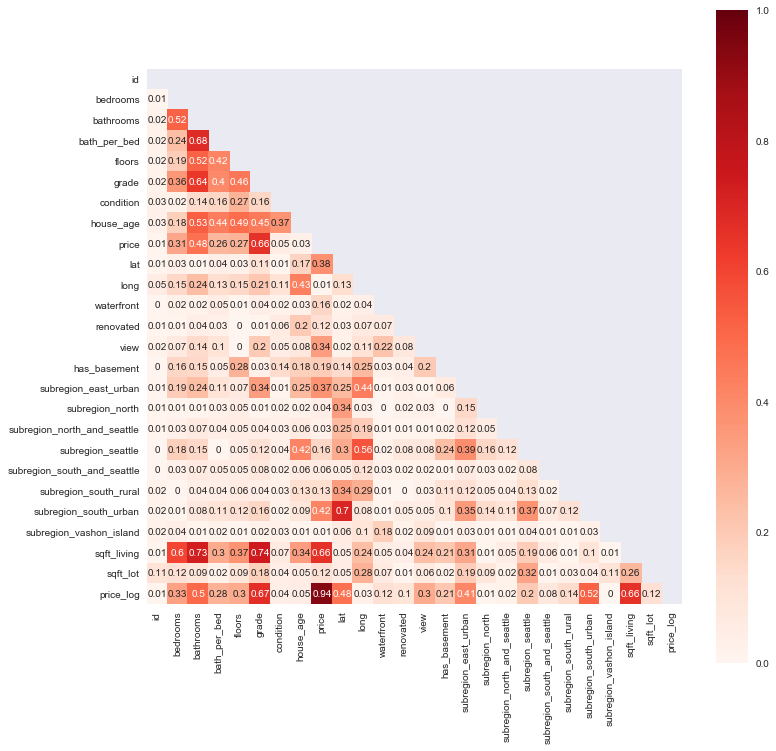

<Figure size 864x864 with 0 Axes>

In [200]:
nontransform_df.drop('sqft_lot15', axis=1, inplace=True)
heat_corr(nontransform_df, nontransform_df.columns)

### Another graph for presentation

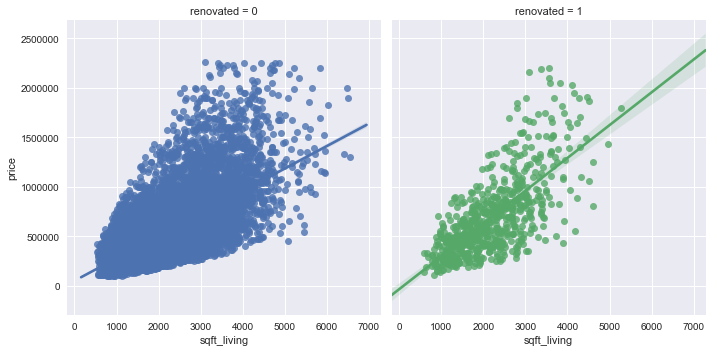

In [270]:
sns.lmplot(x='sqft_living', y='price', col='renovated', data=nontransform_df, hue='renovated')

# MODEL

#### Question 3:
**What are the most important factors under a homeowner's control when it comes to determining the price of a house in King County, WA?**

The answer for this question could help focus homeowners on the aspects of their house they can improve in order to increase the value of the home they are selling. Not only that, but it could also give them insight on which factors they do not necessarily need to worry about as much as others.

In [201]:
zipcode_model.head(3)

price_log  sqft_living_log  ...  zipcode_98198  zipcode_98199
id                                      ...                              
7129300520  -1.396379        -1.137533  ...              0              0
6414100192   0.280619         0.707592  ...              0              0
5631500400  -1.792645        -2.149421  ...              0              0

[3 rows x 84 columns]

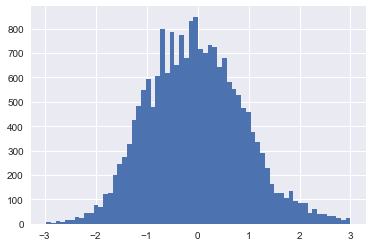

In [202]:
zipcode_model['price_log'].hist(bins='auto');

### Baseline Model

In [203]:
target = 'price_log'
predictors = zipcode_model.drop(['price', 'price_log'], axis=1).columns
preds = '+'.join(predictors)

In [204]:
f = target + '~' + preds

In [205]:
model = ols(formula=f, data=zipcode_model).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1721.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:43:26   Log-Likelihood:                -6207.6
No. Observations:               20027   AIC:                         1.258e+04
Df Residuals:                   19944   BIC:                         1.324e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9202      0.018    -51.236      0.000      -0.955      -0.885
sqft_living_log       0.3263      0.006     56.080      0.000       0.315       0.338
sqft_living15_log     0.1016      0.004     23.901      0.000       0.093       0.110
sqft_lot_log          0.0731      0.004     17.746      0.000       0.065       0.081
bedrooms              0.0072      0.004      1.665      0.096      -0.001       0.016
bath_per_bed          0.0328      0.004      8.488      0.000       0.025       0.040
floors                0.0004      0.004      0.095      0.925      -0.007       0.008
grade                 0.2156      0.005     47.240      0.000       0.207       0.225
condition             0.0619      0.003     22.867      0.000       0.057       0.067
house_age             0.0169      0.004      4.047      0.000       0.009       0.025
waterfront            1.0485      0.036     29.248      0.000       0.978       1.119
renovated             0.1411      0.014     10.234      0.000       0.114       0.168
view                  0.2615      0.009     28.249      0.000       0.243       0.280
has_basement         -0.0776      0.006    -12.131      0.000      -0.090      -0.065
zipcode_98002         0.0029      0.030      0.097      0.922      -0.055       0.061
zipcode_98003         0.0200      0.027      0.747      0.455      -0.032       0.072
zipcode_98004         2.0761      0.027     76.869      0.000       2.023       2.129
zipcode_98005         1.3721      0.032     42.793      0.000       1.309       1.435
zipcode_98006         1.2008      0.024     49.875      0.000       1.154       1.248
zipcode_98007         1.2128      0.034     36.128      0.000       1.147       1.279
zipcode_98008         1.2210      0.027     45.531      0.000       1.168       1.274
zipcode_98010         0.4407      0.041     10.626      0.000       0.359       0.522
zipcode_98011         0.8412      0.030     28.298      0.000       0.783       0.899
zipcode_98014         0.5749      0.041     14.058      0.000       0.495       0.655
zipcode_98019         0.5961      0.032     18.901      0.000       0.534       0.658
zipcode_98022         0.0382      0.031      1.246      0.213      -0.022       0.098
zipcode_98023        -0.0533      0.023     -2.294      0.022      -0.099      -0.008
zipcode_98024         0.7929      0.056     14.187      0.000       0.683       0.902
zipcode_98027         1.0198      0.026     39.784      0.000       0.970       1.070
zipcode_98028         0.7778      0.027     29.235      0.000       0.726       0.830
zipcode_98029         1.1452      0.026     43.816      0.000       1.094       1.196
zipcode_98030         0.0890      0.027      3.243      0.001       0.035       0.143
zipcode_98031         0.1248      0.027      4.620      0.000       0.072

Some of the p-values of the predictor variables are greater than 0.05, so we will remove them from our model in our next run.

In [206]:
resids = model.resid

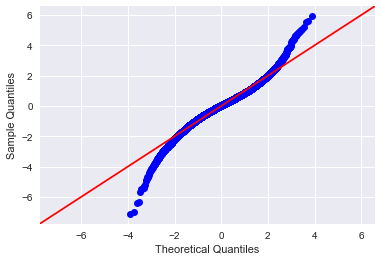

In [207]:
sm.graphics.qqplot(resids, stats.norm, line='45', fit=True);

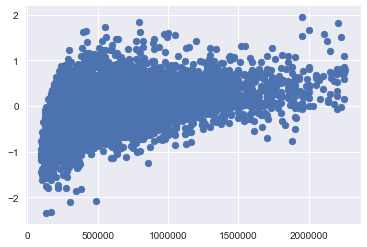

In [208]:
plt.scatter(zipcode_model['price'], resids)

#### Creating functions to make models and plot residuals

In [209]:
def make_model(target, data, x_cols):
    """
    Definition:
    makes a model by using ols from statsmodels.formula.api
    
    Args:
    target = dependent variable
    data = selected dataframe
    x_cols = independent variables
    
    Returns:
    A model
    """
    preds = '+'.join(x_cols)
    f = target + '~' + preds
    model = ols(formula=f, data=data).fit()
    return model       

In [210]:
def loop_alphas(target, data, x_cols, n=5):
    """
    Definition:
    Runs through a loop n number of times, taking out predictor variables within the model.summary table
    that have p-values greater than 0.05. Returns the new model and model.summary
    
    Args:
    target = dependent variable
    data = selected Dataframe
    x_cols = independent variables
    n = number of times to run sequence
    
    Returns:
    The model and the summary
    """
    i = 1
    while i < n:
        model = make_model(target, data, x_cols)
        summary = make_model(target, data, x_cols).summary()
        p_table = summary.tables[1]
        p_table_df = pd.DataFrame(p_table.data)
        p_table_df.columns = p_table_df.iloc[0]
        p_table_df.drop(0, inplace=True)
        p_table_df.set_index(p_table_df.columns[0], inplace=True)
        p_table_df['P>|t|'] = p_table_df['P>|t|'].astype('float64')
        new_x_cols = list(p_table_df[p_table_df['P>|t|'] < 0.05].index)
        new_x_cols.remove('Intercept')
        x_cols = new_x_cols
        i += 1
#         print(len(new_x_cols), len(p_table_df))
    return model, summary

In [211]:
def qq_plot(model):
    """
    Definition:
    Creates a qq plot of the model's residuals to test for normality
    
    Args:
    model = selected model
    
    Returns:
    A graphed qq plot
    """
    resids = model.resid
    with plt.style.context('seaborn'):
        sm.graphics.qqplot(resids, stats.norm, line='45', fit=True);

In [212]:
def resid_scatter(model, target, data):
    """
    Definition:
    Plots a scatter plot to test model residuals for any obvious heteroscedasticity
    
    Args:
    model = selected model
    target = dependent variable
    data = selected DataFrame
    
    Returns:
    a graphed scatter plot comparing model residuals to target variable
    """
    resids = model.resid
    with plt.style.context('seaborn'):
        plt.scatter(data[target], resids);

In [213]:
def dist_resid(model):
    """
    Definition:
    plots a distribution plot of the model's residuals
    
    Args:
    model = selected model
    
    Returns:
    A graphed distplot of the residuals
    """
    resids = model.resid
    plt.figure(figsize=(8,5))
    sns.distplot(resids);

### Zipcode Model

In [214]:
zip_model, zip_summary = loop_alphas('price_log', zipcode_model, zipcode_model.drop(['price', 'price_log'], axis=1).columns, n=3)

In [215]:
zip_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1881.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:43:28   Log-Likelihood:                -6210.7
No. Observations:               20027   AIC:                         1.257e+04
Df Residuals:                   19951   BIC:                         1.317e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9130      0.009    -98.906      0.000      -0.931      -0.895
sqft_living_log       0.3323      0.005     73.835      0.000       0.323       0.341
sqft_living15_log     0.1014      0.004     23.918      0.000       0.093       0.110
sqft_lot_log          0.0725      0.004     18.552      0.000       0.065       0.080
bath_per_bed          0.0292      0.003      9.652      0.000       0.023       0.035
grade                 0.2150      0.005     47.436      0.000       0.206       0.224
condition             0.0622      0.003     23.110      0.000       0.057       0.067
house_age             0.0155      0.004      3.862      0.000       0.008       0.023
waterfront            1.0474      0.036     29.249      0.000       0.977       1.118
renovated             0.1428      0.014     10.393      0.000       0.116       0.170
view                  0.2618      0.009     28.350      0.000       0.244       0.280
has_basement         -0.0779      0.006    -13.841      0.000      -0.089      -0.067
zipcode_98004         2.0688      0.022     93.283      0.000       2.025       2.112
zipcode_98005         1.3656      0.028     48.552      0.000       1.310       1.421
zipcode_98006         1.1934      0.018     64.526      0.000       1.157       1.230
zipcode_98007         1.2069      0.030     40.482      0.000       1.148       1.265
zipcode_98008         1.2149      0.022     55.491      0.000       1.172       1.258
zipcode_98010         0.4324      0.039     11.209      0.000       0.357       0.508
zipcode_98011         0.8340      0.025     32.715      0.000       0.784       0.884
zipcode_98014         0.5662      0.038     14.908      0.000       0.492       0.641
zipcode_98019         0.5885      0.028     21.302      0.000       0.534       0.643
zipcode_98023        -0.0607      0.017     -3.479      0.001      -0.095      -0.026
zipcode_98024         0.7858      0.054     14.612      0.000       0.680       0.891
zipcode_98027         1.0126      0.021     49.276      0.000       0.972       1.053
zipcode_98028         0.7703      0.022     35.391      0.000       0.728       0.813
zipcode_98029         1.1382      0.021     53.905      0.000       1.097       1.180
zipcode_98030         0.0820      0.023      3.599      0.000       0.037       0.127
zipcode_98031         0.1180      0.022      5.300      0.000       0.074       0.162
zipcode_98033         1.4704      0.019     78.876      0.000       1.434       1.507
zipcode_98034         1.0233      0.017     60.475      0.000       0.990       1.056
zipcode_98038         0.2901      0.017     17.000      0.000       0.257       0.324
zipcode_98039         2.3585      0.061     38.467      0.000       2.238       2.479
zipcode_98040         1.6337      0.023     70.650      0.000       1.588

This is our refined zipcode model. It has a high R squared value, and many predictor variables. Shown below, the tails are fatter than the tails of a normal distribution, but overall it's not a bad model.

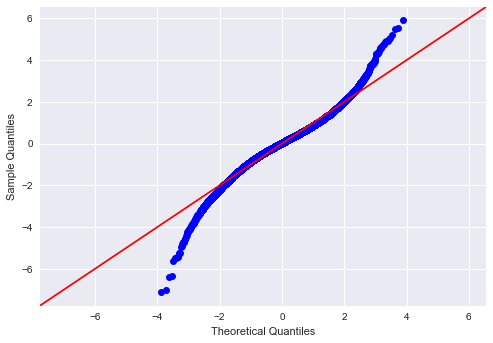

In [216]:
qq_plot(zip_model)

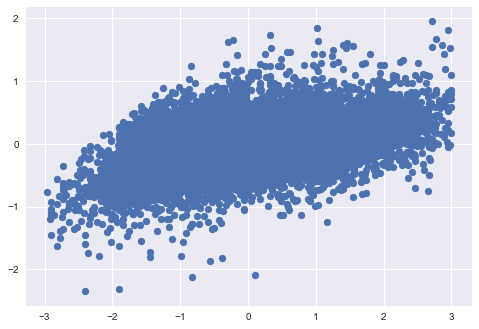

In [217]:
resid_scatter(zip_model, 'price_log', zipcode_model)

#### Creating a function that runs your dataframe through VIF to determine if any columns have a high multicollinearity with another

In [218]:
def vif(df, non_target_cols):
    """
    Definition:
    Returns a list with each object in the list being the name of a column and it's variance inflation factor
    
    Args:
    df = selected dataframe
    non_target_cols = columns that are not independent variables
    """
    x_targets = df.drop(non_target_cols, axis=1)
    vif = [variance_inflation_factor(x_targets.values, i) for i in range(x_targets.shape[1])]
    return list(zip(x_targets, vif))

In [219]:
vif(zipcode_model, ['price', 'price_log'])

[('sqft_living_log', 5.612814969617525),
 ('sqft_living15_log', 3.0951275980752606),
 ('sqft_lot_log', 2.3987467020714437),
 ('bedrooms', 2.8978664022249028),
 ('bath_per_bed', 2.421078983275542),
 ('floors', 2.5766667334992333),
 ('grade', 3.2548818181532044),
 ('condition', 1.3215858301431551),
 ('house_age', 3.149266090171851),
 ('waterfront', 1.105290492435608),
 ('renovated', 1.1685049382763864),
 ('view', 1.4202332536381301),
 ('has_basement', 2.9141529535984074),
 ('zipcode_98002', 1.0227471515942608),
 ('zipcode_98003', 1.0206630101931349),
 ('zipcode_98004', 1.0380496410057516),
 ('zipcode_98005', 1.0262344168389714),
 ('zipcode_98006', 1.0785165512490689),
 ('zipcode_98007', 1.008629142087035),
 ('zipcode_98008', 1.0255681598968704),
 ('zipcode_98010', 1.0210476222850053),
 ('zipcode_98011', 1.0158649007043146),
 ('zipcode_98014', 1.025542051497251),
 ('zipcode_98019', 1.0247433619427548),
 ('zipcode_98022', 1.024634888508711),
 ('zipcode_98023', 1.0408739316408662),
 ('zipco

Since there are no variables that have a high multicollinearity with one another, we are going to save this model.

In [220]:
zip_model_and_summary = [zip_model, zip_summary]

In [221]:
#Saving model with zipcodes and summary
with open('zip_model.pickle', 'wb') as f:
    pickle.dump(zip_model_and_summary, f, pickle.HIGHEST_PROTOCOL)

In [222]:
# with open('zip_model.pickle', 'rb') as f:
#     saved_m_and_s = pickle.load(f)

### Testing Subregion Model

In [223]:
#Saving subregion model
subregion_model.to_csv('sub_model_final.csv')

In [236]:
subregion_model = pd.read_csv('sub_model_final.csv', index_col='id')

In [237]:
subregion_model.describe()

price_log  ...  subregion_vashon_island
count  20027.000000  ...             20027.000000
mean      -0.041408  ...                 0.003096
std        0.937483  ...                 0.055555
min       -2.973117  ...                 0.000000
25%       -0.703157  ...                 0.000000
50%       -0.074498  ...                 0.000000
75%        0.579539  ...                 0.000000
max        2.998376  ...                 1.000000

[8 rows x 23 columns]

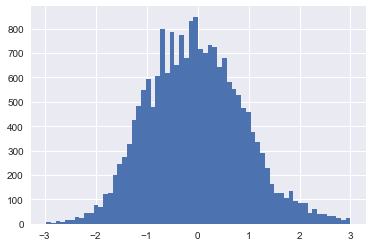

In [238]:
subregion_model['price_log'].hist(bins='auto');

In [239]:
sub_model, sub_summary = loop_alphas('price_log', subregion_model, 
                             subregion_model.drop(['price', 'price_log'], axis=1).columns)

In [240]:
sub_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     4253.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:46:57   Log-Likelihood:                -10929.
No. Observations:               20027   AIC:                         2.190e+04
Df Residuals:                   20007   BIC:                         2.206e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.1494      0.016     -9.547      0.000      -0.180      -0.119
sqft_living_log                 0.3096      0.006     53.077      0.000       0.298       0.321
sqft_living15_log               0.1372      0.005     26.690      0.000       0.127       0.147
bath_per_bed                    0.0401      0.004     10.479      0.000       0.033       0.048
floors                          0.0215      0.004      4.971      0.000       0.013       0.030
grade                           0.2939      0.006     53.219      0.000       0.283       0.305
condition                       0.0744      0.003     22.346      0.000       0.068       0.081
house_age                       0.1269      0.005     26.805      0.000       0.118       0.136
waterfront                      0.9772      0.045     21.676      0.000       0.889       1.066
renovated                       0.1589      0.017      9.184      0.000       0.125       0.193
view                            0.2569      0.011     22.661      0.000       0.235       0.279
has_basement                   -0.0288      0.008     -3.718      0.000      -0.044      -0.014
subregion_east_urban            0.4128      0.017     24.841      0.000       0.380       0.445
subregion_north                 0.0857      0.020      4.322      0.000       0.047       0.125
subregion_north_and_seattle     0.1742      0.022      7.786      0.000       0.130       0.218
subregion_seattle               0.5203      0.018     29.346      0.000       0.486       0.555
subregion_south_and_seattle    -0.1830      0.030     -6.122      0.000      -0.242      -0.124
subregion_south_rural          -0.4371      0.021    -20.437      0.000      -0.479      -0.395
subregion_south_urban          -0.5518      0.017    -33.292      0.000      -0.584      -0.519
subregion_vashon_island        -0.1560      0.056     -2.769      0.006      -0.266      -0.046
==============================================================================
Omnibus:                      633.451   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1749.986
Skew:                           0.003   Prob(JB):                         0.00
Kurtosis:                       4.448   Cond. No.                         36.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While our subregion model has a lower R squared score than our zipcode model, the amount of predictor variables are significantly lower - which makes it much easier to interpret. Shown below, the tails are much closer aligned to the tails of a normal distribution.

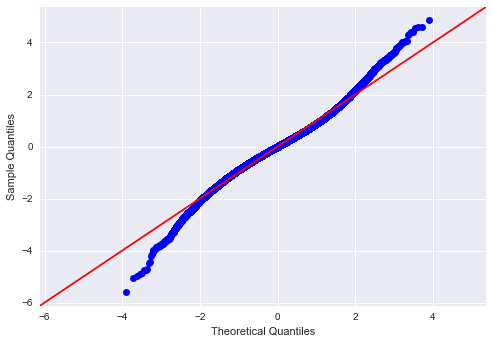

In [241]:
qq_plot(sub_model)

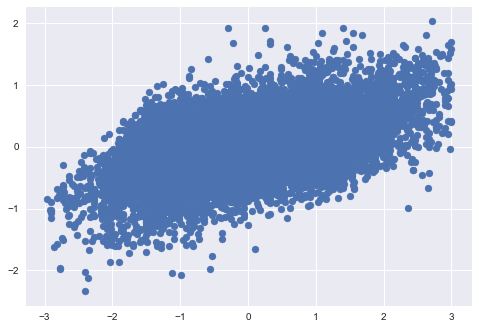

In [242]:
resid_scatter(sub_model, 'price_log', subregion_model)

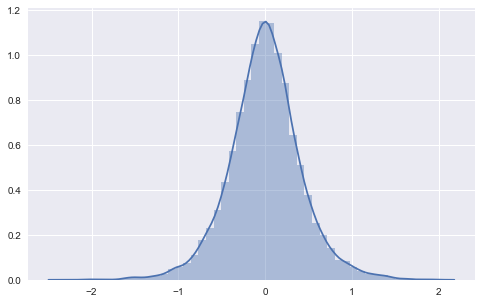

In [243]:
dist_resid(sub_model)

#### vif stuff

In [244]:
vif(subregion_model, ['price', 'price_log'])

[('sqft_living_log', 5.4924494622871185),
 ('sqft_living15_log', 2.8651390998984203),
 ('sqft_lot_log', 2.027555402890867),
 ('bedrooms', 2.8446848254289185),
 ('bath_per_bed', 2.3918016438820398),
 ('floors', 2.4478369319754627),
 ('grade', 2.9766043871070784),
 ('condition', 1.2594202008039639),
 ('house_age', 2.655715574107942),
 ('waterfront', 1.0966428397149965),
 ('renovated', 1.1528463146619523),
 ('view', 1.3325747755683244),
 ('has_basement', 2.784870639140419),
 ('subregion_east_urban', 1.3879021133656904),
 ('subregion_north', 1.0844176922310527),
 ('subregion_north_and_seattle', 1.0679672546483665),
 ('subregion_seattle', 2.5859599962922077),
 ('subregion_south_and_seattle', 1.037933464884607),
 ('subregion_south_rural', 1.068557309756816),
 ('subregion_south_urban', 1.318276591346026),
 ('subregion_vashon_island', 1.0603013716086513)]

Since there are no variables that have a high multicollinearity with one another, we are going to save this model.

In [245]:
sub_model_and_summary = [sub_model, sub_summary]
#Saving model with subregions and summary
with open('sub_model.pickle', 'wb') as f:
    pickle.dump(sub_model_and_summary, f, pickle.HIGHEST_PROTOCOL)

### Answer for Question 2:
**Does a model perform better when we use zipcode as our location category or subregions as our location category?**

After refining our **Zipcode Model** and our **Subregion Model**, we see that the most important factors when determining price is the location of the house. While some locations have a stronger relationship than price, some are also negatively related to price. It seems that from our subregion model, any southern subregion has a negative correlation to price. In terms of which model has a higher R squared value, we see that our zipcode model beats our subregions model with an 0.87 compared to our subregion model's R squared value of 0.80. 

However, our subregion model contains only 19 different variables, while our zipcode model contains 73. Our zipcode model is stronger, but our subregion model is easier to digest and interpret.

In [246]:
key_factors1 = sub_model.params.sort_values(ascending=False).to_frame().style.background_gradient(cmap="Greens")
key_factors1

In [247]:
key_factors2 = sub_model.params.sort_index().to_frame().style.background_gradient(cmap="Greens")
key_factors2

### Using RFE to see the variables that have the most impact on price in terms of their coefficient's absolute value

In [271]:
predictors = subregion_model.drop(['price', 'price_log'], axis=1)

In [272]:
linreg = LinearRegression()
selector = RFE(linreg)
selector = selector.fit(predictors, subregion_model['price_log'])

In [273]:
predictors.columns[selector.support_]

Index(['sqft_living_log', 'grade', 'waterfront', 'view',
       'subregion_east_urban', 'subregion_seattle',
       'subregion_south_and_seattle', 'subregion_south_rural',
       'subregion_south_urban', 'subregion_vashon_island'],
      dtype='object')

In [274]:
new_preds = list(predictors.columns[selector.support_])
model, summary = loop_alphas('price_log', subregion_model, new_preds)

In [275]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     6781.
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        12:18:06   Log-Likelihood:                -12316.
No. Observations:               20027   AIC:                         2.465e+04
Df Residuals:                   20016   BIC:                         2.474e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.1085      0.009    -12.322      0.000      -0.126      -0.091
sqft_living_log                 0.3804      0.005     77.062      0.000       0.371       0.390
grade                           0.2783      0.005     54.408      0.000       0.268       0.288
waterfront                      1.0822      0.048     22.479      0.000       0.988       1.177
view                            0.3707      0.012     31.602      0.000       0.348       0.394
subregion_east_urban            0.3684      0.011     33.821      0.000       0.347       0.390
subregion_seattle               0.5032      0.011     47.296      0.000       0.482       0.524
subregion_south_and_seattle    -0.2930      0.028    -10.296      0.000      -0.349      -0.237
subregion_south_rural          -0.5592      0.018    -30.637      0.000      -0.595      -0.523
subregion_south_urban          -0.6552      0.011    -60.651      0.000      -0.676      -0.634
subregion_vashon_island        -0.2166      0.059     -3.696      0.000      -0.331      -0.102
==============================================================================
Omnibus:                      626.173   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1633.023
Skew:                           0.088   Prob(JB):                         0.00
Kurtosis:                       4.388   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

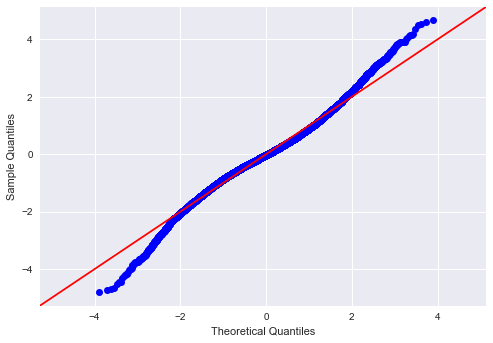

In [276]:
qq_plot(model)

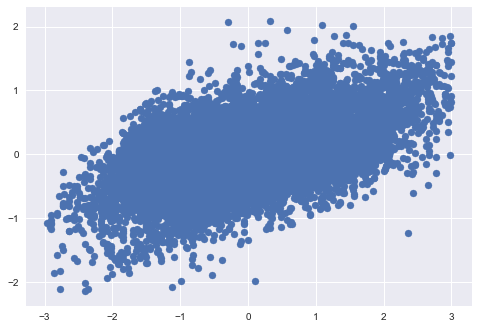

In [277]:
resid_scatter(model, 'price_log', subregion_model)

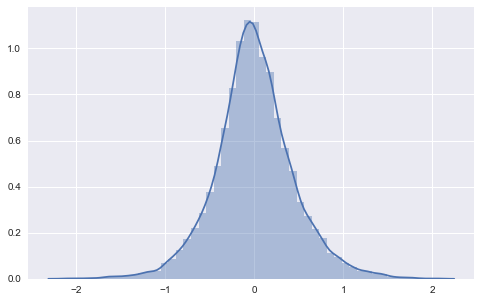

In [278]:
dist_resid(model)

#### Top 10 impactful predictors for determining the selling price of a house (not in order):
- 'sqft_living_log'
- 'grade'
- 'waterfront'
- 'view'
- 'subregion_east_urban'
- 'subregion_seattle'
- 'subregion_south_and_seattle'
- 'subregion_south_rural'
- 'subregion_south_urban'
- 'subregion_vashon_island'

## Cross Validation

### Zipcode Cross Validation

#### Cross Validating our zipcode model to make sure it is stable.

In [279]:
linreg = LinearRegression()
X = zipcode_model.drop(['price', 'price_log'], axis=1)
y = zipcode_model[['price_log']]

In [280]:
cv_5_mse = np.mean(cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error'))
cv_10_mse = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_mse = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

cv_5_r_squared = np.mean(cross_val_score(linreg, X, y, cv=5, scoring='r2'))
cv_10_r_squared = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='r2'))
cv_20_r_squared = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='r2'))

In [281]:
print(f"CV 5 MSE: {cv_5_mse}\nCV 10 MSE: {cv_10_mse}\nCV 20 MSE: {cv_20_mse}"
      f"\n\nCV 5 R2: {cv_5_r_squared}\nCV 10 R2: {cv_10_r_squared}\nCV 20 R2: {cv_20_r_squared}")

CV 5 MSE: -0.11072320028368679
CV 10 MSE: -0.11060231684436725
CV 20 MSE: -0.110183949245297

CV 5 R2: 0.8735945520038524
CV 10 R2: 0.8732854591222813
CV 20 R2: 0.8738085175396935


### Subregion Cross Validation

#### Cross validating our subregion model to make sure it is stable.

In [282]:
linreg = LinearRegression()
X = subregion_model.drop(['price', 'price_log'], axis=1)
y = subregion_model[['price_log']]

In [283]:
cv_5_mse = np.mean(cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error'))
cv_10_mse = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_mse = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

cv_5_r_squared = np.mean(cross_val_score(linreg, X, y, cv=5, scoring='r2'))
cv_10_r_squared = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='r2'))
cv_20_r_squared = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='r2'))

In [284]:
print(f"CV 5 MSE: {cv_5_mse}\nCV 10 MSE: {cv_10_mse}\nCV 20 MSE: {cv_20_mse}"
      f"\n\nCV 5 R2: {cv_5_r_squared}\nCV 10 R2: {cv_10_r_squared}\nCV 20 R2: {cv_20_r_squared}")

CV 5 MSE: -0.17554311156652974
CV 10 MSE: -0.17547332856018602
CV 20 MSE: -0.17511437505069288

CV 5 R2: 0.7994721333240489
CV 10 R2: 0.7986499722631241
CV 20 R2: 0.7989679967633752


# INTERPRET

### While the zipcode model proved to have a higher R squared score, there were fewer factors in the subregion model. In my opinion, I prefer the subregion model because it is easier to read, despite the fact that the subregion model had a lower R squared. Both models ended up showing strong stability in cross validation. 


### Answer for Question 3:

**Top factors that play a significant role when determining the selling price of a house (within our designated range of values) in Kings County in Washington State:**
 - the sqft living area of the house
 - grade of the house
 - if the house is considered a waterfront property
 - if people have shown interest in the house and it has been viewed
 - the average sqft living area of your 15 closest neighbors' houses
 - Age of the house
 - If the house has been renovated
 - The location of the house.

In [286]:
key_factors1

### The Factors that don't play as significant of a role when determining the selling price of a house:
- If the house has a basement
- How many floors the house has
- the bathroom to bedroom ratio
- the condition of the house
- If the house is located in the North Subregion

# CONCLUSIONS & RECOMMENDATIONS

### Conclusions:

- Since we logged and scaled many of our values, it does make these models harder to interpret. However, because the values were all z-scored, they are all on the same scale. Therefore we can determine which factors play a significant role when determining the price of a house based off of our model coefficients.


### Recommendations:
- If you're selling your house or looking to improve the value of it, I recommend you renovate your house to increase the sq ft living area of the house, which has been determined to be a strong influential factor when identifying the price of your house. 
- Grade is the one of the highest influential factors that correlates with price, so improving your grade will ultimately improve the value of your home. By spending money to renovate your house using high quality materials to increase the sq ft living area, you will also increase the grade of your house.
- Focus on factors you CAN control if you are currently looking to move and/or increase the overall value of your home.
